# Import Modules

In [1]:
import pandas as pd
from pprint import pprint as pp
import matplotlib.pyplot as plt
import numpy as np
import requests
import urllib.parse
import time
import datetime as dt

# For converting dataframes to csv and creating new folders
import os
from os import listdir
from os.path import isfile, join

# For exploratory analysis: Heatmaps and World Maps
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import math

# Model building and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




### Load a .csv File

- Drop NaN values
- Input file name and header lines

In [2]:
b

# Process the WEO Spreadsheet

The WEO (World Economic Outlook) is a report released by the IMF (International Monetary Fund) that summarises a range of Economic Indicators of member countries. It provides predictions on some indicators over the next 5 years, and includes data on things such as GDP, unemployment, population and more. 

Step 1 is to process the data into a format that is easier to work with. The aim of the first stage of processing is to get it into a format that can then be read by the program and analysed further. 

.csv filename is the WEO Subject Code

The data is cleaned by:
- Removing white space from the column values so when one column is searched, i.e. WEO Subject Code searched for the string 'PPPPC' it recognises it still.
- Replacing commas from all values under the year columns, i.e. the numerical values, so that they can then be converted into numerical values. 
- 'NaN' values will be dealt with later on, as the weather data will filter the Countries allowed for analysis based on how much data is available. 

In [3]:
# Save the WEO spreadsheet as 'spreadsheet'
file_name = 'WEOOct2021all.csv'
header_lines = 0

spreadsheet = import_csv(file_name, header_lines)


## Exploratory Analysis of the WEO Spreadsheet

In [4]:
# See what the spreadsheet looks like, what data is there and a general idea of the information that appears 
# in each variable column.
print(spreadsheet.head())

  WEO Country Code  ISO WEO Subject Code      Country  \
0              512  AFG           NGDP_R  Afghanistan   
1              512  AFG        NGDP_RPCH  Afghanistan   
2              512  AFG             NGDP  Afghanistan   
3              512  AFG            NGDPD  Afghanistan   
4              512  AFG           PPPGDP  Afghanistan   

                        Subject Descriptor  \
0  Gross domestic product, constant prices   
1  Gross domestic product, constant prices   
2   Gross domestic product, current prices   
3   Gross domestic product, current prices   
4   Gross domestic product, current prices   

                                       Subject Notes  \
0  Expressed in billions of national currency uni...   
1  Annual percentages of constant price GDP are y...   
2  Expressed in billions of national currency uni...   
3  Values are based upon GDP in national currency...   
4  These data form the basis for the country weig...   

                                           

In [5]:
# Number of rows and columns. There is a huge amount of data in this spreadsheet so it will need splitting
# into more manageable chunks and filtered into samples. 
print(spreadsheet.shape)

(8823, 57)


In [6]:
# Get a list of the column names so we know what information is there
print(spreadsheet.columns.values)

['WEO Country Code' 'ISO' 'WEO Subject Code' 'Country'
 'Subject Descriptor' 'Subject Notes' 'Units' 'Scale'
 'Country/Series-specific Notes' '1980' '1981' '1982' '1983' '1984' '1985'
 '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995'
 '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023' '2024' '2025'
 '2026' 'Estimates Start After']


In [7]:
# Find out the format of the data in the spreadsheet under each column
print(spreadsheet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               8822 non-null   object 
 1   ISO                            8820 non-null   object 
 2   WEO Subject Code               8820 non-null   object 
 3   Country                        8820 non-null   object 
 4   Subject Descriptor             8820 non-null   object 
 5   Subject Notes                  8624 non-null   object 
 6   Units                          8820 non-null   object 
 7   Scale                          3920 non-null   object 
 8   Country/Series-specific Notes  7634 non-null   object 
 9   1980                           3872 non-null   object 
 10  1981                           3992 non-null   object 
 11  1982                           4032 non-null   object 
 12  1983                           4074 non-null   o

In [8]:
# How many times each Country comes up (i.e. how many variables there are for each country)
print(spreadsheet.Country.value_counts())

Afghanistan      45
Netherlands      45
Nicaragua        45
Niger            45
Nigeria          45
                 ..
Grenada          45
Guatemala        45
Guinea           45
Guinea-Bissau    45
Zimbabwe         45
Name: Country, Length: 196, dtype: int64


<AxesSubplot:>

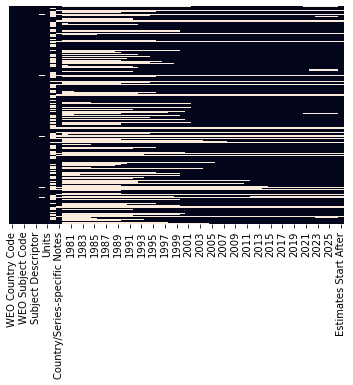

In [9]:
sns.heatmap(spreadsheet.isnull(),cbar=False,yticklabels=False)
plt.show()

There are a lot of missing values in this dataframe. Therefore, countries with missing values must be filtered out later, or variables with missing values should not be used. 

### Cleaning Data

From the 'info()' method we can see that the values we want to be numerical are actually objects. Therefore they need to be converted to floats. However, by running 'spreadsheet.head()' you can see that many of these values contain commas which won't allow it to be converted to a float. The commas need to be removed then these values can be converted to floats.

In [10]:
# Convert all table entries to floats
spreadsheet.loc[:, '1980':] = spreadsheet.loc[:, '1980':].replace(',','', regex=True).apply(pd.to_numeric,errors='coerce')

In [96]:
# Remove rows with NaN values
spreadsheet = spreadsheet.dropna(axis=0, subset=[str(i) for i in range(1980, 2021)])
spreadsheet

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,Estimates Start After
45,914,ALB,NGDP_R,Albania,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: IMF Staff Estimates. Official national...,311.514,...,821.061,838.908,811.130,854.120,892.555,929.150,963.528,997.116,1031.810,2020.0
46,914,ALB,NGDP_RPCH,Albania,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",2.684,...,4.071,2.174,-3.311,5.300,4.500,4.100,3.700,3.486,3.479,2020.0
47,914,ALB,NGDP,Albania,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: IMF Staff Estimates. Official national...,18.489,...,1635.720,1679.250,1607.980,1719.110,1824.660,1931.780,2039.330,2150.510,2267.580,2020.0
48,914,ALB,NGDPD,Albania,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",1.946,...,15.147,15.283,14.828,16.770,18.012,18.931,20.026,21.150,22.308,2020.0
49,914,ALB,PPPGDP,Albania,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",5.759,...,40.075,41.678,40.784,44.493,47.775,50.917,54.005,57.101,60.312,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,754,ZMB,BCA,Zambia,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Central Bank Latest actual data: 2019 ...,-0.589,...,-0.341,0.131,2.004,2.933,3.577,4.109,4.100,3.731,3.696,2019.0
8774,754,ZMB,BCA_NGDPD,Zambia,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-13.867,...,-1.298,0.561,10.375,13.517,14.925,16.772,16.240,14.055,13.188,2019.0
8791,698,ZWE,PCPI,Zimbabwe,"Inflation, average consumer prices","Expressed in averages for the year, not end-of...",Index,NaN,Source: National Statistics Office Latest actu...,160.147,...,65.526,232.807,1530.030,2945.920,3849.100,4627.420,5444.420,6125.800,6741.300,2019.0
8802,698,ZWE,LP,Zimbabwe,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,7.092,...,14.642,14.905,15.189,15.492,15.817,16.164,16.481,16.790,17.095,2017.0


## Load .csv of Capital Cities

A .csv file is imported. This contains information on Countries, their Capital Cities and the Continents they belong to.

First, white space is removed from column values so they are easily comparable to the Country names in the WEO spreadsheet. The list is then filtered to show only countries that also appear in the WEO spreadsheet. 

A new column is created called 'location_name' which concatenates the Capital city and Country columns. E.g. 'Paris' and 'France' become 'Paris, France' in the location_name column. This can then be put into Open Street Map API to give more accurate coordinates of the Capital City of each Country.

In [97]:
# Load the list of capital countries
file_name = 'list-of-countries-in-the-world.csv'
header_lines = 1

capitals = import_csv(file_name, header_lines)

print(capitals.head())

   S.No.               Country            Capital Continent
0      1          Afghanistan              Kabul       Asia
1      2              Albania             Tirana     Europe
2      3              Algeria            Algiers     Africa
3      4  American Samoa (USA)         Pago Pago    Oceania
4      5              Andorra   Andorra La Vella     Europe


You can see that there is a space after each column in the capitals csv file as there is a misalignment with the headings. This needs to be removed. 

In [98]:
# Get rid of white space in columns (excluding index and first column)
for column_name in capitals.columns[1:]:
    capitals[column_name] = capitals[column_name].str.strip()

A new column needs to be added to the capitals dataframe, with the country's capital city and the name of the country combined. This will make the coordinate calculation of that location more accurate, as many cities have the same name. 

In [100]:
# Create a list of country capital cities that appear in the WEO spreadsheet and their country names
country_rows = capitals

new_column = country_rows[['Capital', 'Country']].agg(', '.join, axis=1).tolist()

country_rows['location_name'] = new_column

location_names = country_rows['location_name']

pp(location_names)

0                        Kabul, Afghanistan
1                           Tirana, Albania
2                          Algiers, Algeria
3           Pago Pago, American Samoa (USA)
4                 Andorra La Vella, Andorra
                       ...                 
231    Mata-Utu, Wallis and Futuna (France)
232                El Aaiun, Western Sahara
233                           Sana'a, Yemen
234                          Lusaka, Zambia
235                        Harare, Zimbabwe
Name: location_name, Length: 236, dtype: object


## Save WEO data as .csv files by Country Code

1. Create a new DataFrame containing unique values of 'WEO Subject Code' along with their associated 'Subject Descriptor' and 'Units'.
2. Create a directory called 'data' to save the files in.
3. For each WEO Subject Code, extract rows from the main WEO spreadsheet containing this data and save it to a .csv file with it's name being the WEO Subject Code.

In [101]:
countries = spreadsheet['Country'].unique().tolist()
subject_id = spreadsheet['WEO Subject Code'].unique().tolist()

codes_and_keys = spreadsheet[['WEO Subject Code', 'Subject Descriptor', 'Units']].drop_duplicates(subset=['WEO Subject Code']).dropna().set_index('WEO Subject Code')

In [430]:
pp(subject_id)

['NGDP_R',
 'NGDP_RPCH',
 'NGDP',
 'NGDPD',
 'PPPGDP',
 'NGDP_D',
 'NGDPRPC',
 'NGDPRPPPPC',
 'NGDPPC',
 'NGDPDPC',
 'PPPPC',
 'PPPSH',
 'PPPEX',
 'NID_NGDP',
 'NGSD_NGDP',
 'LUR',
 'LP',
 'NGDP_FY',
 'BCA',
 'BCA_NGDPD',
 'PCPI',
 'PCPIPCH',
 'PCPIE',
 'PCPIEPCH',
 'TMG_RPCH',
 'TXG_RPCH',
 'TM_RPCH',
 'TX_RPCH',
 'NGAP_NPGDP',
 'LE',
 'GGSB',
 'GGR',
 'GGR_NGDP',
 'GGX',
 'GGX_NGDP',
 'GGXCNL',
 'GGXCNL_NGDP',
 'GGXONLB',
 'GGXONLB_NGDP',
 'GGXWDG',
 'GGXWDG_NGDP',
 'GGSB_NPGDP',
 'GGXWDN',
 'GGXWDN_NGDP',
 'FLIBOR6']


In [429]:
pp(countries)

['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'The Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Democratic Republic of the Congo',
 'Republic of Congo',
 'Costa Rica',
 "CÙte d'Ivoire",
 'Cyprus',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'The Gambia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong SAR',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Islamic Republic of Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 '

In [104]:
# Loop through WEO country code and save a new spreadsheet for each indicator
outdir = './data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

for idx in subject_id:
    indicator = spreadsheet[spreadsheet['WEO Subject Code'] == idx]
    fullname = os.path.join(outdir, str(idx) + '.csv') 
    indicator.to_csv(fullname)


## Save WEO Data as Country .csv Files

In [105]:
# Loop through Countries and save a new spreadsheet for each Country
outdir_country = './country'
if not os.path.exists(outdir_country):
    os.mkdir(outdir_country)

for country in countries:
    indicator = spreadsheet[spreadsheet['Country'] == country]
    fullname = os.path.join(outdir_country, str(country) + '.csv') 
    indicator.to_csv(fullname)

# Collecting Weather Data

1. Input capital city and country name from 'country_rows' into 'Open Street Map' to get the longitude and latitude of every capital city.
2. Input these coordinates into the 'Nearby Station' API from Meteostat to get the weather station IDs for each country.
3. Loop through weather station ID and collect weather data for every single station, to then save as a csv file

In [445]:
latitude = []
longitude = []

for address in country_rows['location_name']:
    
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    if not response:
        country_rows = country_rows[country_rows['location_name'] != address]
        pass
    else:
        latitude.append(response[0]["lat"])
        longitude.append(response[0]["lon"])
        
country_rows['latitude'] = latitude
country_rows['longitude'] = longitude

In [107]:
# Get longitude and latitude from city name and country name
latitude = []
longitude = []

for address in country_rows['location_name']:
    
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    latitude.append(response[0]["lat"])
    longitude.append(response[0]["lon"])
    
country_rows['latitude'] = latitude
country_rows['longitude'] = longitude

In [108]:
# Check what the country_rows dataframe is looking like
print(country_rows.head())

   S.No.               Country           Capital Continent  \
0      1           Afghanistan             Kabul      Asia   
1      2               Albania            Tirana    Europe   
2      3               Algeria           Algiers    Africa   
3      4  American Samoa (USA)         Pago Pago   Oceania   
4      5               Andorra  Andorra La Vella    Europe   

                     location_name     latitude     longitude  
0               Kabul, Afghanistan   34.5260109    69.1776838  
1                  Tirana, Albania   41.3279485    19.8185512  
2                 Algiers, Algeria   36.7753606     3.0601882  
3  Pago Pago, American Samoa (USA)  -14.2754786  -170.7048298  
4        Andorra La Vella, Andorra   42.5069391     1.5212467  


In [110]:
# Get station_id from all the coordinates in the table above and save as a new column in country_rows
station_id = []
url = "https://meteostat.p.rapidapi.com/stations/nearby"
headers = {
    'x-rapidapi-host': "meteostat.p.rapidapi.com",
    'x-rapidapi-key': "d9f3ee70a4msh8b20f32b6e44c76p128132jsnc7804697f53c"
    }

def api_request(url_, headers_, longitude_, latitude_):
    querystring = {"lat":latitude_,"lon":longitude_, "limit":1}
    response = requests.request("GET", url_, headers=headers_, params=querystring)
    time.sleep(0.1) # because there's a limit of 10 requests per second
    df = response.json()
    if not df['data']: # some entries have empty lists
        return np.nan # These can be deleted later
    else:
        location = df['data'][0]
        station_id = location['id']
        return station_id

country_rows['station_id'] = country_rows.apply(lambda row: api_request(url, headers, row['longitude'], row['latitude']), axis = 1)

In [111]:
# Check station_id was added to the country_rows dataframe correctly
print(country_rows.head())

   S.No.               Country           Capital Continent  \
0      1           Afghanistan             Kabul      Asia   
1      2               Albania            Tirana    Europe   
2      3               Algeria           Algiers    Africa   
3      4  American Samoa (USA)         Pago Pago   Oceania   
4      5               Andorra  Andorra La Vella    Europe   

                     location_name     latitude     longitude station_id  
0               Kabul, Afghanistan   34.5260109    69.1776838      40948  
1                  Tirana, Albania   41.3279485    19.8185512      13601  
2                 Algiers, Algeria   36.7753606     3.0601882      60369  
3  Pago Pago, American Samoa (USA)  -14.2754786  -170.7048298      91765  
4        Andorra La Vella, Andorra   42.5069391     1.5212467      LESU0  


Clean the country_rows spreadsheet by removing 'NaN' values. Save as a new spreadsheet called 'location_info'. This will later be used to make a call to the weather API to get weather data for each 'station_id'.

In [112]:
location_info = country_rows[country_rows['station_id'].notna()]
location_info.reset_index()
print(location_info)

     S.No.                     Country           Capital Continent  \
0        1                 Afghanistan             Kabul      Asia   
1        2                     Albania            Tirana    Europe   
2        3                     Algeria           Algiers    Africa   
3        4        American Samoa (USA)         Pago Pago   Oceania   
4        5                     Andorra  Andorra La Vella    Europe   
..     ...                         ...               ...       ...   
230    231                     Vietnam             Hanoi      Asia   
231    232  Wallis and Futuna (France)          Mata-Utu   Oceania   
233    234                       Yemen            Sana'a      Asia   
234    235                      Zambia            Lusaka    Africa   
235    236                    Zimbabwe            Harare    Africa   

                            location_name     latitude     longitude  \
0                      Kabul, Afghanistan   34.5260109    69.1776838   
1              

# Get Weather Data for each Country through Meteostat API

Connect to the weather API and save a .csv file for every country, with every country's weather data per month since 1980 until today. Name the csv file '[[country-name]].csv'

Data is saved in a directory within the current folder called 'monthly_weather'.

In [113]:
outdir_month = './monthly_weather'
if not os.path.exists(outdir_month):
    os.mkdir(outdir_month)


endpoint = 'monthly' # change to hourly, daily, monthly,
start_date = '1980-01-01'
end_date = '2021-01-01'
url = "https://meteostat.p.rapidapi.com/stations/{}".format(endpoint)
headers = {
    'x-rapidapi-host': "meteostat.p.rapidapi.com",
    'x-rapidapi-key': "d9f3ee70a4msh8b20f32b6e44c76p128132jsnc7804697f53c"
    }

def get_weather(outdir_month_, station_id_, start_date_, end_date_, url_, headers_, country_name_):
    querystring = {"station":station_id_,"start":start_date_,"end":end_date_}
    response = requests.request("GET", url_, headers=headers_, params=querystring)
    df = response.json()
    if not df['data']:
        pass
    else:
        # Convert the data to a dataframe (so it can be accessed like a table)
        weather_by_month = pd.DataFrame(df['data'])

        # Convert date to datetime format
        weather_by_month['date'] = pd.to_datetime(weather_by_month.date)

        # Write datetime as year and month
        weather_by_month['date'] = weather_by_month['date'].dt.strftime('%Y-%m')  

        fullname = os.path.join(outdir_month_, country_name_)
        weather_by_month.to_csv(fullname + '.csv')

        
location_info.apply(lambda row: get_weather(outdir_month, row['station_id'], start_date, end_date, url, headers, row['Country']), axis = 1)

0      None
1      None
2      None
3      None
4      None
       ... 
230    None
231    None
233    None
234    None
235    None
Length: 219, dtype: object

## Process Weather Data

1. Read the file names in the directory and save in a list called 'onlyfiles'
2. Read the first file and create a DataFram with column names the same as the file (i.e. tavg, tmin, tmax etc.)
3. Create a list of countries from the csv files, removing the '.csv' extension ('country_list)
4. Loop
    a) For every country, read the csv, convert to a pandas DataFrame and set index to date
    b) Count the number of 'NaN' values in each column
    c) Append the counts to the DataFrame
5. Add a column for 'Country' based on values in the country_list and set this as the index

In [114]:
# Read country names from csv files saved in the monthly weather folder
mypath = 'monthly_weather'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = sorted(onlyfiles)[1:]
pp(onlyfiles)

['Afghanistan.csv',
 'Algeria.csv',
 'American Samoa (USA).csv',
 'Angola.csv',
 'Antigua and Barbuda.csv',
 'Argentina.csv',
 'Armenia.csv',
 'Aruba (Netherlands).csv',
 'Australia.csv',
 'Austria.csv',
 'Azerbaijan.csv',
 'Bahamas.csv',
 'Bahrain.csv',
 'Bangladesh.csv',
 'Belarus.csv',
 'Belgium.csv',
 'Belize.csv',
 'Benin.csv',
 'Bolivia.csv',
 'Bosnia and Herzegovina.csv',
 'Botswana.csv',
 'Brunei.csv',
 'Bulgaria.csv',
 'Burkina Faso.csv',
 'Burundi.csv',
 'Cambodia.csv',
 'Cameroon.csv',
 'Cape Verde.csv',
 'Central African Republic.csv',
 'Chad.csv',
 'Chile.csv',
 'China.csv',
 'Christmas Island (Australia).csv',
 'Cocos (Keeling) Islands (Australia).csv',
 'Colombia.csv',
 'Comoros.csv',
 'Cook Islands (New Zealand).csv',
 'Croatia.csv',
 'Cuba.csv',
 'Curacao (Netherlands).csv',
 'Czech Republic.csv',
 'D.R Congo.csv',
 'Denmark.csv',
 'Djibouti.csv',
 'East Timor (Timor-Leste).csv',
 'Ecuador.csv',
 'Egypt.csv',
 'El Salvador.csv',
 'Equatorial Guinea.csv',
 'Eritrea.csv'

## Count NaN values for each Variable for each Country

Find out how many NaN values there are for each country throughout the years 1980 to now and use this to filter which countries to use. Those with fewer NaN values will have the most reliable data.

In [115]:
# For every Country in the list, read the country's .csv weather file, count NaN values in each column
# and add the counts to a new dataframe with country name as the index.

# Load dataframe setup file and read csv, set index to date
setup_path = os.path.join('./monthly_weather', onlyfiles[0])
setup_csv = pd.read_csv(setup_path, header=0, index_col=[0]).set_index('date')

# Create dataframe with columns Country and headings of csv
nan_df = pd.DataFrame(columns=setup_csv.columns)

# Create empty country list
country_list = [file.replace('.csv', '') for file in onlyfiles]

for file in onlyfiles:
    path_name = os.path.join('./monthly_weather', file)
    country_csv = pd.read_csv(path_name, header=0, index_col=[0]).set_index('date')
    nan_count = country_csv.isna().sum()
    nan_df = nan_df.append(nan_count, ignore_index=True)

# Create a Country column for country names
nan_df['Country'] = pd.Series(country_list)

nan_df = pd.DataFrame(nan_df.set_index('Country'))
print(nan_df.head())

                     tavg tmin tmax prcp snow wdir wspd wpgt pres tsun
Country                                                               
Afghanistan           202  445  444  342  493  493  468  493  470  488
Algeria               307  329  329  327  493  493  493  493  329  472
American Samoa (USA)   22    0    0    0  113  460   35  193   83  134
Angola                305  422  422  400  493  466  463  493  390  492
Antigua and Barbuda   492  492  492  493  493  492  492  493  492  493


## Filter Countries for Average Temperature

1. Select country names from the index column based on having fewer than 10 'NaN' values in the 'tavg' column. This means fewer than 10% of the values are NaN.
2. Save the country names to a new list.
3. Loop through each variable to find all countries with less than 10 'NaN' values and save this to a dictionary. Key-Value pairs are Column name-Countries

In [116]:
# Find out which countries have no missing average temperature values
# Total weather data points are 493, so having fewer than 10 means 2% of values are missing
filtered = nan_df[nan_df['tavg'] < 9]

In [117]:
#Create a list of the selected countries
filtered_countries = filtered.index.tolist()
print('There are {} countries that have fewer than 10 values in the tavg column'.format(len(filtered_countries)))
print(filtered_countries)

There are 44 countries that have fewer than 10 values in the tavg column
['Australia', 'Austria', 'Bahamas', 'Belarus', 'Benin', 'Bulgaria', 'China', 'Cocos (Keeling) Islands (Australia)', 'Colombia', 'Cook Islands (New Zealand)', 'Czech Republic', 'Fiji', 'French Polynesia (France)', 'Iceland', 'India', 'Ireland', 'Jamaica', 'Japan', 'Kazakhstan', 'Lithuania', 'Luxembourg', 'Malaysia', 'Moldova', 'Monaco', 'Morocco', 'Niger', 'Norfolk Island (Australia)', 'North Korea', 'Norway', 'Paraguay', 'Peru', 'Poland', 'Saint Pierre and Miquelon (France)', 'San Marino', 'Senegal', 'Seychelles', 'South Korea', 'Thailand', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'United States', 'Uzbekistan']


In [118]:
dict_of_countries = {} # to use for each column value if required

for column in nan_df.columns:
    values = nan_df[nan_df[column] < 10].index.tolist()
    dict_of_countries[column] = values  
    
pp(dict_of_countries)

{'prcp': ['American Samoa (USA)',
          'Bulgaria',
          'French Guiana (France)',
          'French Polynesia (France)',
          'Guam (USA)',
          'Ireland',
          'Japan',
          'Luxembourg',
          'Marshall Islands',
          'Micronesia',
          'Norway',
          'Palau',
          'Poland',
          'Portugal',
          'Russia',
          'Serbia',
          'Spain',
          'United States'],
 'pres': [],
 'snow': ['Guam (USA)', 'Micronesia', 'Norway'],
 'tavg': ['Australia',
          'Austria',
          'Bahamas',
          'Belarus',
          'Benin',
          'Bulgaria',
          'China',
          'Cocos (Keeling) Islands (Australia)',
          'Colombia',
          'Cook Islands (New Zealand)',
          'Czech Republic',
          'Fiji',
          'French Polynesia (France)',
          'Iceland',
          'India',
          'Ireland',
          'Jamaica',
          'Japan',
          'Kazakhstan',
          'Lithuania',
       

## Change Country Names

Country names are written differently in the filtered countries list compared to the country names written in the WEO spreadsheet. Therefore the WEO spreadsheet column titles must be updated to match those from the filtered countries list so the weather and economic indicators can be compared. 

In [433]:
# Find out how many countries there are
print('There are {} countries in the filtered_countries list.'.format(len(filtered_countries)))

There are 28 countries in the filtered_countries list.


In [434]:
test1 = spreadsheet[spreadsheet['WEO Subject Code'] == 'PPPPC']
test2 = test1[test1['Country'].isin(filtered_countries)]
print('{} countries from the filtered_countries list appear in exactly the same format as the WEO spreadsheet.'.format(test2['Country'].size))

28 countries from the filtered_countries list appear in exactly the same format as the WEO spreadsheet.


In [435]:
countries_to_find = [x for x in filtered_countries if x not in countries]
pp(countries_to_find)

[]


In [436]:
pp(countries)

['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'The Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Democratic Republic of the Congo',
 'Republic of Congo',
 'Costa Rica',
 "CÙte d'Ivoire",
 'Cyprus',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'The Gambia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong SAR',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Islamic Republic of Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 '

In [187]:
changes = ['Bahamas', 'North Korea']
to = ['The Bahamas', 'Korea']
# Change .csv names
for i in range(len(changes)):
    filename = (changes[i] + '.csv')
    path = os.path.join('./monthly_weather', filename)
    new_filename = (to[i] + '.csv')
    new_path = os.path.join('./monthly_weather', new_filename)
    os.rename(path, new_path)

FileNotFoundError: [Errno 2] No such file or directory: './monthly_weather/Bahamas.csv' -> './monthly_weather/The Bahamas.csv'

In [192]:
# Remove countries from filtered_countries
countries_to_find = [x for x in countries_to_find if x not in changes]
filtered_countries = [x for x in filtered_countries if x not in countries_to_find]

# Change the name of filtered countries
for i in range(len(filtered_countries)):
    if filtered_countries[i] == 'Bahamas':
        filtered_countries[i] = 'The Bahamas'
    elif filtered_countries[i] == 'North Korea':
        filtered_countries[i] = 'Korea'

print(filtered_countries)

['Australia', 'Austria', 'The Bahamas', 'Benin', 'Bulgaria', 'China', 'Colombia', 'Fiji', 'Iceland', 'India', 'Ireland', 'Jamaica', 'Japan', 'Luxembourg', 'Malaysia', 'Morocco', 'Niger', 'Korea', 'Norway', 'Paraguay', 'Peru', 'Poland', 'Senegal', 'Seychelles', 'Thailand', 'Tunisia', 'Turkey', 'United States']


## Access ['tavg'] Weather Column for Filtered List of Countries

1. Create an empty DataFrame with column names set to country names from the list of filtered countries. 
2. Load a setup DataFrame from the first country in the filtered countries list. Use this to extract the dates column and add this to the new DataFrame
3. Loop
    a) For each country, load the .csv file of weather data
    b) Add the average temperature column from the Country's .csv file to the Country's column in the avg_temp_df DataFrame. 
4. Set the index to 'date' and convert this to datetime format

In [193]:
# DataFrame for the temperature by month of every country. Column name is the country, index is the date
avg_temp_df = pd.DataFrame(columns=filtered_countries)

path_dir = os.path.join('./monthly_weather', filtered_countries[0] + '.csv')
setup_df = pd.read_csv(path_dir, header=0)
avg_temp_df['date'] = setup_df['date']
avg_temp_df['date'] = avg_temp_df['date'].astype(str) + '-01'


for country in filtered_countries:
    path_dir = os.path.join('./monthly_weather', country + '.csv')
    country_df = pd.read_csv(path_dir, header=0)
    avg_temp_df[country] = country_df['tavg']
    
    
avg_temp_df = avg_temp_df.set_index('date')
avg_temp_df.index = pd.to_datetime(avg_temp_df.index)

print(avg_temp_df.head)

<bound method NDFrame.head of             Australia  Austria  The Bahamas  Benin  Bulgaria  China  Colombia  \
date                                                                            
1980-01-01       20.0     -3.1         20.9   27.9      -4.0   -4.5      13.5   
1980-02-01       20.7      2.6         19.5   28.6       0.2   -2.9      13.3   
1980-03-01       19.1      4.2         22.5   28.9       3.9    4.2      14.3   
1980-04-01       15.5      7.3         23.8   29.0       7.9   10.5      14.2   
1980-05-01       11.2     12.5         25.6   27.3      12.8   19.3      14.2   
...               ...      ...          ...    ...       ...    ...       ...   
2020-09-01       11.1     16.9         28.8   26.3      18.9   21.8      13.6   
2020-10-01       14.5     11.2         27.8   27.4      12.3   13.5      13.9   
2020-11-01       17.8      6.1         26.5   28.8       5.2    6.5      13.9   
2020-12-01       18.4      3.3         23.1   28.8       4.3   -2.2      13.7  

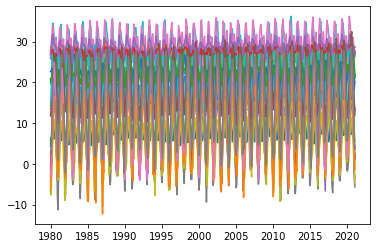

In [446]:
for country in filtered_countries:
    plt.plot(avg_temp_df.index, avg_temp_df[country])

# Create a DataFrame for the Average Temperature by Year

The temperature is generally in the same region except for as it gets towards 2021. This will be because the dataset doesn't currently have data for the end of 2021. Therefore, the x axis should be cut after 2020.

In [194]:
yearly_weather = avg_temp_df.reset_index()
yearly_weather['year'] = pd.DatetimeIndex(yearly_weather['date']).year 
yearly_weather_pivot = pd.pivot_table(yearly_weather, index='year', aggfunc='mean')
dates = yearly_weather_pivot.index.tolist()
dates = [(str(i) + '-01-01') for i in dates]
yearly_weather_pivot.index = pd.DatetimeIndex(pd.Series(dates)) 

# The year 2021 is predictive so this must be dropped
yearly_weather_pivot = yearly_weather_pivot.drop(yearly_weather_pivot.tail(1).index)

pp(yearly_weather_pivot)

            Australia    Austria      Benin   Bulgaria      China   Colombia  \
1980-01-01  13.900000   8.983333  27.241667   9.200000  11.041667  13.600000   
1981-01-01  13.791667  10.391667  27.333333   9.775000  12.333333  13.416667   
1982-01-01  13.866667  10.166667  26.866667   9.533333  12.800000  13.566667   
1983-01-01  13.525000  10.983333  26.925000   9.825000  12.983333  13.925000   
1984-01-01  12.258333   9.591667  27.283333   9.683333  11.900000  12.791667   
1985-01-01  12.850000   9.233333  27.083333   9.808333  11.533333  12.975000   
1986-01-01  12.766667   9.791667  26.808333   9.941667  12.125000  13.225000   
1987-01-01  13.075000   9.508333  27.866667  10.150000  12.283333  13.841667   
1988-01-01  13.866667  10.625000  27.491667   9.833333  12.691667  13.366667   
1989-01-01  13.066667  10.858333  27.058333  10.091667  13.191667  13.183333   
1990-01-01  13.558333  11.050000  27.325000  10.700000  12.683333  13.783333   
1991-01-01  13.783333   9.891667  27.333

In [195]:
# Get the minimum and maximum of the average temperatures each year for each country
# To be used as the y axis scale later on when plotting graphs
min_temps = []
max_temps = []

for country in yearly_weather_pivot.columns:
    min_temps.append(min(yearly_weather_pivot[country]))
    max_temps.append(max(yearly_weather_pivot[country]))
    
min_temp = min(min_temps)
max_temp = max(max_temps)

print(min_temp, max_temp)

3.408333333333333 30.566666666666666


## Plot the Yearly Average Temperature by Year of Each Country

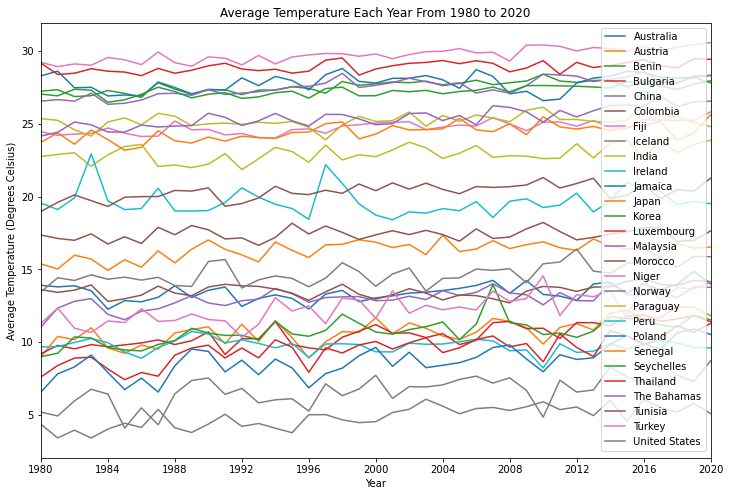

In [438]:
plt.figure(figsize=(12, 8))
for country in yearly_weather_pivot.columns:
    plt.plot(yearly_weather_pivot[country])
    low = dt.datetime.strptime('1980-01-01', '%Y-%m-%d')
    high = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
    plt.xlim([low, high])
plt.legend(yearly_weather_pivot.columns)
plt.xlabel('Year')
plt.ylabel('Average Temperature (Degrees Celsius)')
plt.title("Average Temperature Each Year From 1980 to 2020")
plt.show()

## Plot the Location of Filtered Countries on a World Map

Based on the list of filtered_countries, plot the location of the Country (using it's coordinates from the country_rows dataframe), including a pop-up label including the City name, Country name and average temperature of that country. 

This will help identify countries to analyse later on when only a few need to be compared. The countries further away from each other will likely be the most interesting comparison. 

In [197]:
world = folium.Map(titles='cartodbpositron')
marker = MarkerCluster().add_to(world)
filtered_locations = location_info[location_info['Country'].isin(filtered_countries)]

for row in range(len(filtered_locations)):
    latitude = filtered_locations.iloc[row]['latitude']
    longitude = filtered_locations.iloc[row]['longitude']
    radius = 5
    city_country = filtered_locations.iloc[row]['location_name']
    country_name = filtered_locations.iloc[row]['Country']
    avg_temp = yearly_weather_pivot[country_name].mean()
    temp_format = "{:.2f}".format(avg_temp)
    pop_up = 'City Name: {} \nAverage Yearly Temperature: {} Degrees Celsius'.format(city_country, temp_format)
    folium.CircleMarker(location=[latitude, longitude], radius=radius, popup=pop_up, fill=True).add_to(marker)
    
world

## Plot Min and Max Temperatures by Country

Find the maximum temperature each year and the minimum each year. Then plot these to find out if there's an extreme or noticable difference in how these change from the year 1980 to 2020. 

In [198]:
yearly_weather = avg_temp_df.reset_index()
yearly_weather['year'] = pd.DatetimeIndex(yearly_weather['date']).year 

# Average maximum temperature by year
max_yearly = pd.pivot_table(yearly_weather, index='year', aggfunc='max')
dates = max_yearly.index.tolist()
dates = [(str(i) + '-01-01') for i in dates]
max_yearly.index = pd.DatetimeIndex(pd.Series(dates)) 
max_yearly = max_yearly.drop(columns='date')
max_yearly = max_yearly.drop(max_yearly.tail(1).index)

# Average minimum temperature by year
min_yearly = pd.pivot_table(yearly_weather, index='year', aggfunc='min')
dates = min_yearly.index.tolist()
dates = [(str(i) + '-01-01') for i in dates]
min_yearly.index = pd.DatetimeIndex(pd.Series(dates)) 
min_yearly = min_yearly.drop(columns='date')
min_yearly = min_yearly.drop(min_yearly.tail(1).index)

In [199]:
print(min_yearly)
print(max_yearly)

            Australia  Austria  Benin  Bulgaria  China  Colombia  Fiji  \
1980-01-01        6.1     -3.1   25.4      -4.0   -4.5      12.4  21.9   
1981-01-01        5.7     -0.8   25.4      -3.2   -4.8      11.7  21.6   
1982-01-01        4.7     -3.1   24.5      -1.7   -4.3      12.7  21.8   
1983-01-01        5.1     -0.9   24.9      -0.8   -2.9      12.9  22.0   
1984-01-01        5.4      0.6   25.4      -0.5   -4.5      10.0  22.5   
1985-01-01        4.5     -5.3   25.2      -3.7   -4.7      12.3  22.2   
1986-01-01        5.3     -4.7   24.2      -1.6   -3.7      12.3  21.1   
1987-01-01        4.7     -4.3   26.3      -2.1   -3.6      13.2  21.2   
1988-01-01        7.1      1.7   25.1      -1.6   -2.9      12.7  23.2   
1989-01-01        5.8      1.4   25.3      -1.2   -2.0      12.6  22.4   
1990-01-01        6.3      0.8   24.7      -3.2   -4.9      13.4  22.4   
1991-01-01        6.3     -2.0   25.5      -2.8   -2.3      13.3  21.9   
1992-01-01        5.9      0.4   25.2 

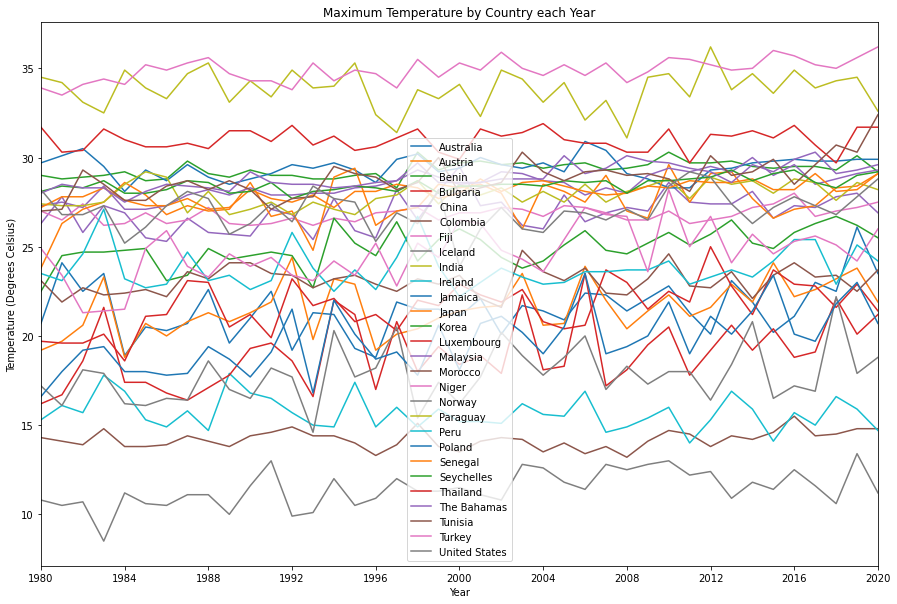

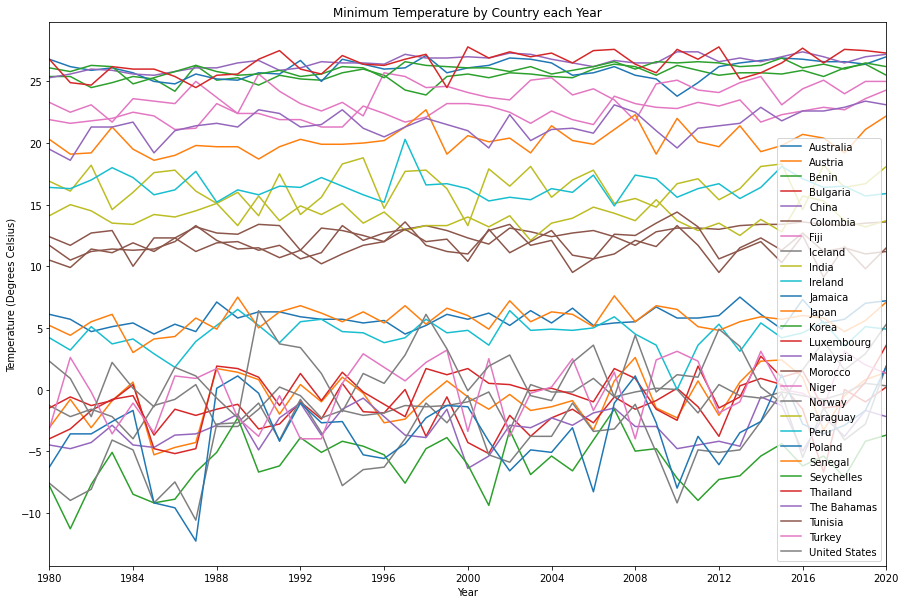

In [200]:
plt.figure(figsize=(15, 10))

# Maximum temperature
for country in max_yearly.columns:
    plt.plot(max_yearly[country])
    low = dt.datetime.strptime('1980-01-01', '%Y-%m-%d')
    high = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
    plt.xlim([low, high])
plt.title('Maximum Temperature by Country each Year')
plt.xlabel('Year')
plt.ylabel('Temperature (Degrees Celsius)')
plt.legend(max_yearly.columns)
plt.show()

# Minimum temperature
plt.figure(figsize=(15, 10))
for country in min_yearly.columns:
    plt.plot(min_yearly[country])
    plt.xlim([low, high])
plt.title('Minimum Temperature by Country each Year')
plt.xlabel('Year')
plt.ylabel('Temperature (Degrees Celsius)')
plt.legend(max_yearly.columns)
plt.show()

Find out the relationship between minimum temperature and maximum temperature across countries. Are they increasing with time? Is one decreasing with time and another increasing?

From plotting the below graphs it is evident there is very little correlation between the minimum temperature over time between each country. The same can be said for Maximum temperaturem although this is a slightly lighter heat map in general. However, from this we can almost confidently say there is not a significantly strong increase or decrease in maximum and minimum temperature over time. 

Countries with the strongest correlations are those which are located closer together, such as Austria, Poland and Luxembourg which are all in Europe. 

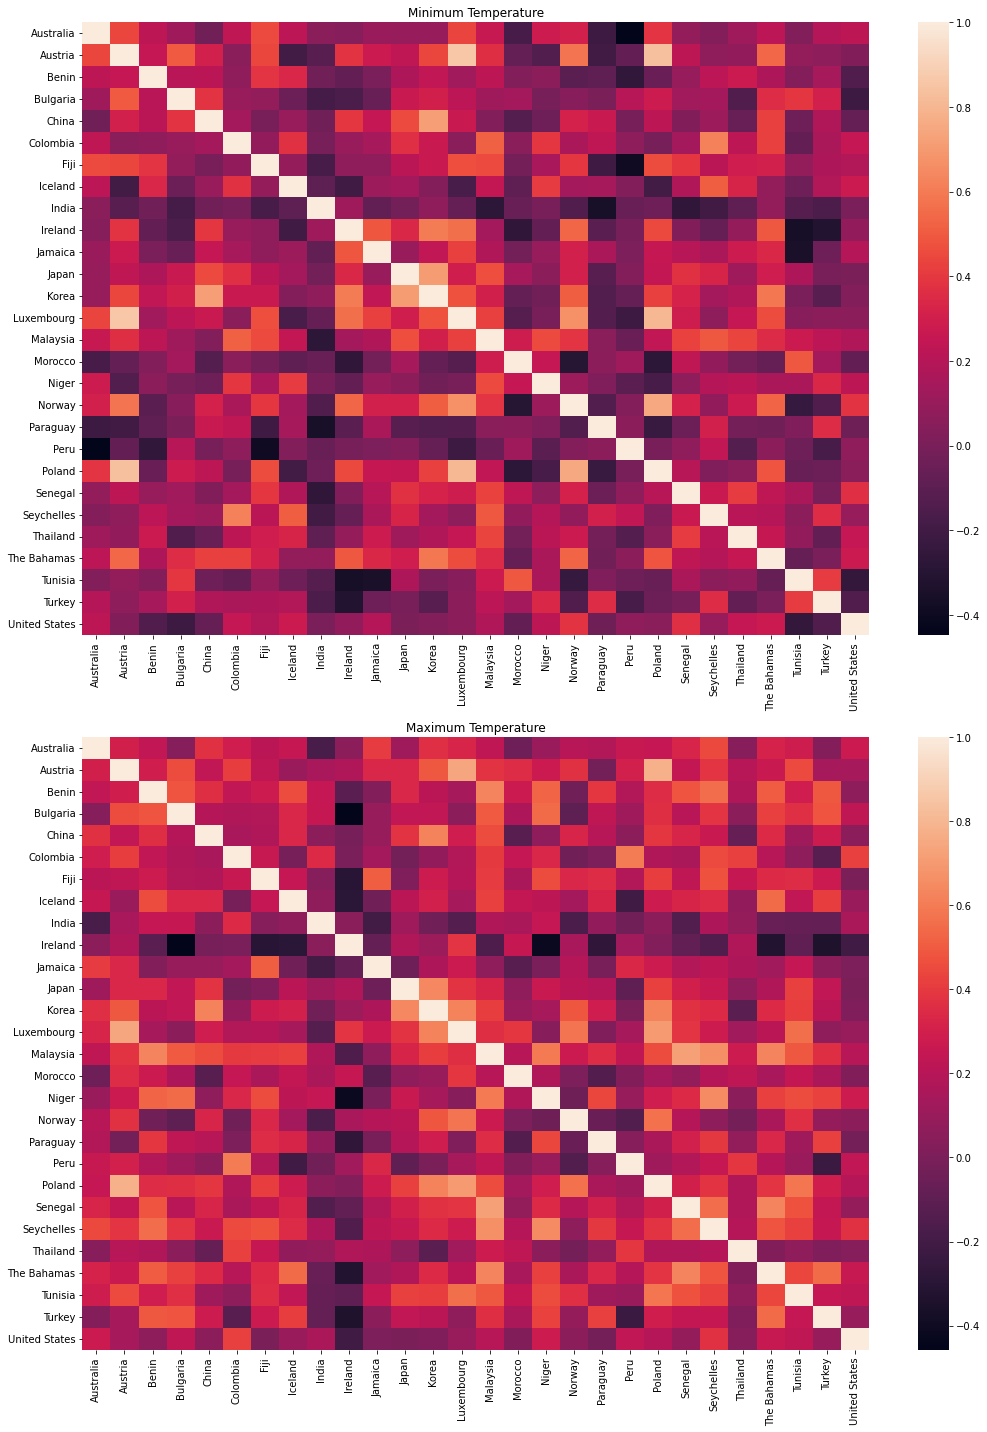

In [201]:
# Find the relationship between minimum temperature of each country with time
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,20))
sns.heatmap(min_yearly.corr(),annot=False, ax=ax1)
ax1.set_title('Minimum Temperature')
sns.heatmap(max_yearly.corr(),annot=False, ax=ax2) 
ax2.set_title('Maximum Temperature')
plt.tight_layout()
plt.show()

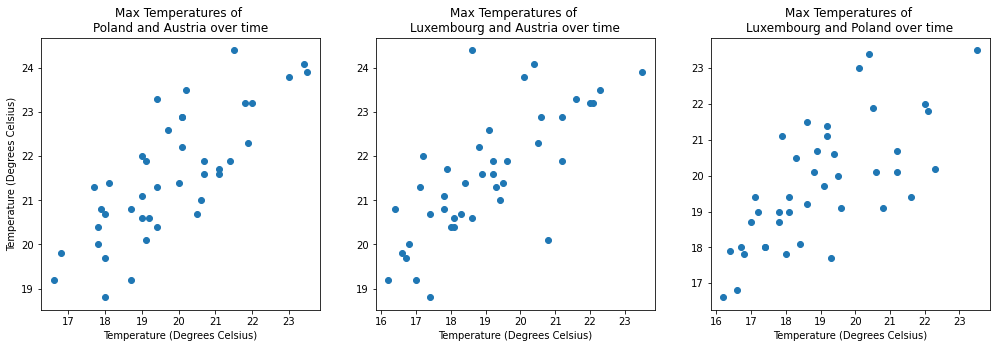

In [202]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))

c1 = max_yearly['Poland']
c2 = max_yearly['Austria']
c3 = max_yearly['Luxembourg']

ax1.scatter(c1, c2)
ax1.set_xlabel('Temperature (Degrees Celsius)')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('Max Temperatures of \nPoland and Austria over time')
ax2.scatter(c3, c2)
ax2.set_xlabel('Temperature (Degrees Celsius)')
ax2.set_title('Max Temperatures of \nLuxembourg and Austria over time')
ax3.scatter(c3, c1)
ax3.set_xlabel('Temperature (Degrees Celsius)')
ax3.set_title('Max Temperatures of \nLuxembourg and Poland over time')
plt.show()

### Model Building

You can build a model to use Poland and Luxembourg temperatures to predict the temperature of Austria.

In [203]:
X = max_yearly[['Poland', 'Austria']] # our feature(s)
y = max_yearly['Luxembourg'] # our target variable

In [204]:
# Split the data to avoid overfitting and to enable us to test the quality of the model with the dataset that
# was not used to train the model

# Use SKLearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5) 

In [205]:
# Find out how many samples we have for each training and test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 2)
(9, 2)
(32,)
(9,)


In [206]:
model = LinearRegression() # getting off the shelf (creating an object of LinearRegression class)

model.fit(X_train, y_train) # finding the best fit (param optim) for our data

LinearRegression()

In [207]:
model.coef_
model.intercept_
equation = 'Equation: y = {:.2f} + {:.2f}*x1 + {:.2f}*x2'.format(model.intercept_, model.coef_[0], model.coef_[1])

print(equation)

Equation: y = 1.24 + 0.55*x1 + 0.32*x2


## Average Min and Average Max Temperature each Year Across all Years

Find the average maximum temperature across all 40 years from 1980 to 2020, and the average minimum, for each country. 

This will result in a Series for min and max temperatures with the Country name as the index. 

In [208]:
# Check what the min_yearly and max_yearly dataframes look like
print(min_yearly, max_yearly)

            Australia  Austria  Benin  Bulgaria  China  Colombia  Fiji  \
1980-01-01        6.1     -3.1   25.4      -4.0   -4.5      12.4  21.9   
1981-01-01        5.7     -0.8   25.4      -3.2   -4.8      11.7  21.6   
1982-01-01        4.7     -3.1   24.5      -1.7   -4.3      12.7  21.8   
1983-01-01        5.1     -0.9   24.9      -0.8   -2.9      12.9  22.0   
1984-01-01        5.4      0.6   25.4      -0.5   -4.5      10.0  22.5   
1985-01-01        4.5     -5.3   25.2      -3.7   -4.7      12.3  22.2   
1986-01-01        5.3     -4.7   24.2      -1.6   -3.7      12.3  21.1   
1987-01-01        4.7     -4.3   26.3      -2.1   -3.6      13.2  21.2   
1988-01-01        7.1      1.7   25.1      -1.6   -2.9      12.7  23.2   
1989-01-01        5.8      1.4   25.3      -1.2   -2.0      12.6  22.4   
1990-01-01        6.3      0.8   24.7      -3.2   -4.9      13.4  22.4   
1991-01-01        6.3     -2.0   25.5      -2.8   -2.3      13.3  21.9   
1992-01-01        5.9      0.4   25.2 

Check the statistical data of the dataframes to find out if there are any outliers and whether averaging will be affected by large differences in maximum and minimum temperature each year.

In [209]:
print(min_yearly.describe())
print(max_yearly.describe())

       Australia    Austria      Benin   Bulgaria      China   Colombia  \
count  41.000000  41.000000  41.000000  41.000000  41.000000  41.000000   
mean    5.807317  -0.775610  25.463415  -1.831707  -3.192683  12.734146   
std     0.748796   1.976586   0.571732   1.681285   1.405950   0.710848   
min     4.500000  -5.300000  23.900000  -6.700000  -6.400000  10.000000   
25%     5.400000  -2.100000  25.300000  -2.800000  -4.500000  12.400000   
50%     5.700000  -0.700000  25.500000  -1.600000  -3.000000  12.900000   
75%     6.200000   0.700000  25.700000  -0.600000  -2.200000  13.300000   
max     7.500000   2.600000  26.400000   0.900000  -0.600000  13.600000   

            Fiji    Iceland      India    Ireland  ...   Paraguay       Peru  \
count  41.000000  41.000000  41.000000  41.000000  ...  41.000000  41.000000   
mean   22.439024  -0.997561  13.960976   4.436585  ...  16.509756  16.460976   
std     0.770350   1.154012   0.857577   1.203486  ...   1.414709   0.982313   
min 

Data from the year 2021 seems to be more extreme so this will be ignored when finding the averages.

In [210]:
min_all_time_avg = min_yearly.mean(axis=0)
max_all_time_avg = max_yearly.mean(axis=0)
avg_all_time = yearly_weather_pivot.mean(axis=0)
print(min_all_time_avg, max_all_time_avg, avg_all_time)


Australia         5.807317
Austria          -0.775610
Benin            25.463415
Bulgaria         -1.831707
China            -3.192683
Colombia         12.734146
Fiji             22.439024
Iceland          -0.997561
India            13.960976
Ireland           4.436585
Jamaica          26.014634
Japan             5.724390
Korea            -5.975610
Luxembourg       -0.200000
Malaysia         26.553659
Morocco          11.568293
Niger            23.992683
Norway           -4.309756
Paraguay         16.509756
Peru             16.460976
Poland           -3.553659
Senegal          20.200000
Seychelles       26.058537
Thailand         26.490244
The Bahamas      21.460976
Tunisia          11.687805
Turkey           -0.060976
United States     1.619512
dtype: float64 Australia        21.529268
Austria          21.565854
Benin            29.339024
Bulgaria         21.682927
China            26.939024
Colombia         14.195122
Fiji             26.809756
Iceland          11.431707
India        

In [211]:
# Create a new DataFrame with Countries as the index, and average min and average max temp as columns.
# Add a new column with the range in values. 

min_max_df = pd.DataFrame(columns=['Avg All Time', 'Avg Min Temp', 'Avg Max Temp', 'Range'])
min_max_df['Avg All Time'] = avg_all_time
min_max_df['Avg Min Temp'] = min_all_time_avg
min_max_df['Avg Max Temp'] = max_all_time_avg
min_max_df['Range'] = min_max_df['Avg Max Temp'] - min_max_df['Avg Min Temp']

min_max_df

,Avg All Time,Avg Min Temp,Avg Max Temp,Range
Australia,13.439024,5.807317,21.529268,15.721951
Austria,10.763211,-0.775610,21.565854,22.341463
Benin,27.592572,25.463415,29.339024,3.875610
Bulgaria,10.520528,-1.831707,21.682927,23.514634
China,12.970325,-3.192683,26.939024,30.131707
Colombia,13.537195,12.734146,14.195122,1.460976
Fiji,24.750684,22.439024,26.809756,4.370732
Iceland,4.868293,-0.997561,11.431707,12.429268
India,25.205229,13.960976,33.821951,19.860976
Ireland,9.744715,4.436585,15.685366,11.248780


Plot the average temperature of each country and the min and max by using an error-bar like graph.

In [212]:
# Get stats of averaging the temperatures by year
avg_all_time_stats = yearly_weather_pivot.describe().T
min_all_time_stats = min_yearly.describe().T
max_all_time_stats = max_yearly.describe().T

# Combine and sort the Stats with the order of increasing average temperatures
avg_all_time_stats['Values'] = min_max_df['Avg All Time']
min_all_time_stats['Values'] = min_max_df['Avg Min Temp']
max_all_time_stats['Values'] = min_max_df['Avg Max Temp']

# Add the original data points to the dataframes of statistics
avg_all_time_stats_sorted = avg_all_time_stats.sort_values('Values')
min_all_time_stats_sorted = min_all_time_stats.sort_values('Values')
max_all_time_stats_sorted = max_all_time_stats.sort_values('Values')

avg_all_time_stats_sorted, min_all_time_stats_sorted, max_all_time_stats_sorted

(               count       mean       std        min        25%        50%  \
 Iceland         41.0   4.868293  0.734883   3.408333   4.350000   5.016667   
 Norway          41.0   6.628714  1.027392   4.091667   6.108333   6.775000   
 Poland          41.0   8.720325  1.076991   6.566667   7.958333   8.808333   
 Luxembourg      41.0   9.472154  0.959795   7.416667   8.916667   9.608333   
 Ireland         41.0   9.744715  0.444979   8.225000   9.516667   9.866667   
 Bulgaria        41.0  10.520528  0.774007   9.150000   9.833333  10.333333   
 Austria         41.0  10.763211  0.893143   8.900000  10.166667  10.833333   
 Korea           41.0  10.767480  0.883567   9.000000  10.325000  10.691667   
 Turkey          41.0  12.365392  1.023784  10.333333  11.483333  12.291667   
 China           41.0  12.970325  0.613672  11.041667  12.733333  13.033333   
 Australia       41.0  13.439024  0.559053  12.258333  13.066667  13.425000   
 Colombia        41.0  13.537195  0.424436  12.69166

/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_30761/2307591297.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_all_time_stats_sorted.index, rotation=90)
/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_30761/2307591297.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(min_all_time_stats_sorted.index, rotation=90)
/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_30761/2307591297.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(max_all_time_stats_sorted.index, rotation=90)


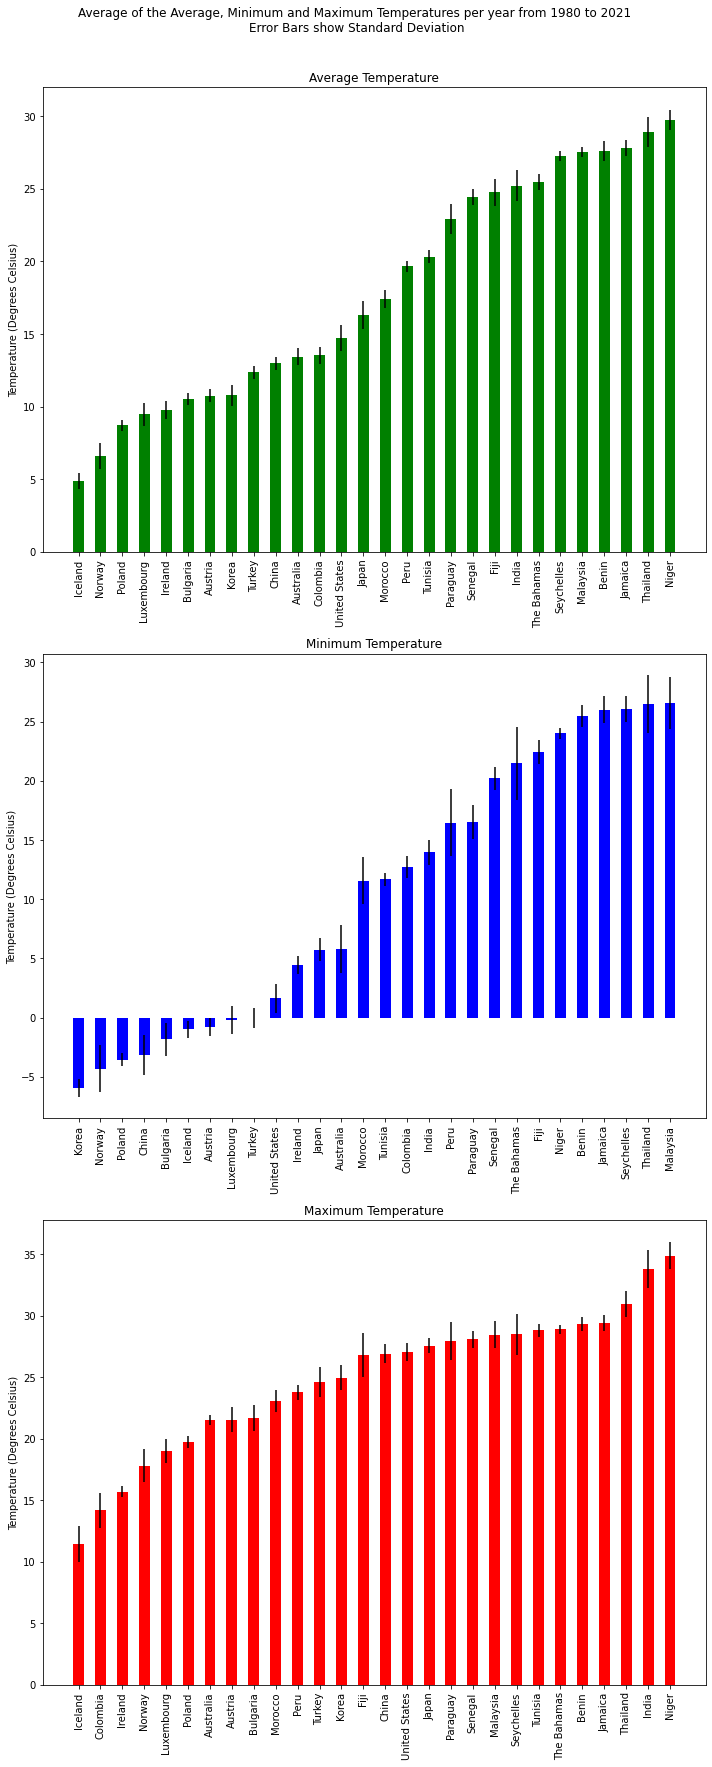

In [213]:
figure, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,25))

# Average Temperatures - All Time
ax1.set_xticklabels(avg_all_time_stats_sorted.index, rotation=90)
ax1.set_title('Average Temperature')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.bar(avg_all_time_stats_sorted.index, avg_all_time_stats_sorted['Values'], width=0.5, yerr=avg_all_time_stats['std'], color='g')

# Minimum Temperatures - All Time
ax2.set_xticklabels(min_all_time_stats_sorted.index, rotation=90)
ax2.set_title('Minimum Temperature')
ax2.set_ylabel('Temperature (Degrees Celsius)')
ax2.bar(min_all_time_stats_sorted.index, min_all_time_stats_sorted['Values'], width=0.5, yerr=min_all_time_stats['std'], color='b')

# Minimum Temperatures - All Time
ax3.set_xticklabels(max_all_time_stats_sorted.index, rotation=90)
ax3.set_title('Maximum Temperature')
ax3.set_ylabel('Temperature (Degrees Celsius)')
ax3.bar(max_all_time_stats_sorted.index, max_all_time_stats_sorted['Values'], width=0.5, yerr=max_all_time_stats['std'], color='r')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Average of the Average, Minimum and Maximum Temperatures per year from 1980 to 2021 \nError Bars show Standard Deviation')
plt.show()

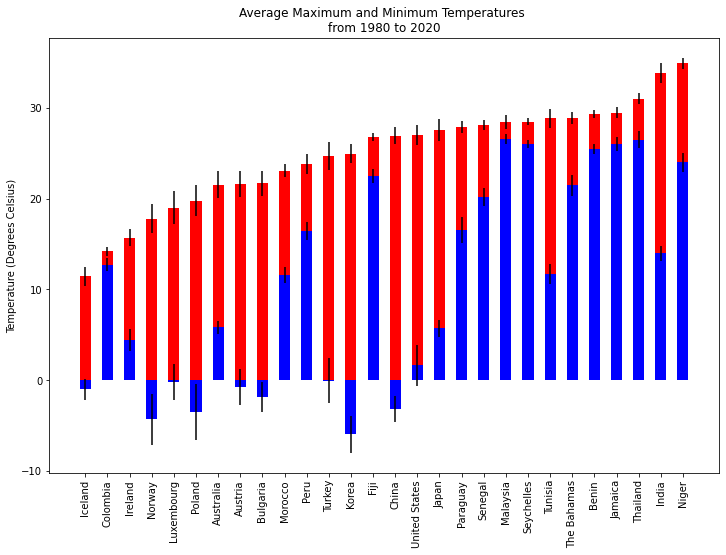

In [214]:
new_avgs = min_max_df
new_avgs['max std'] = max_all_time_stats['std']
new_avgs['min std'] = min_all_time_stats['std']
new_avgs_sorted = new_avgs.sort_values('Avg Max Temp')

plt.figure(figsize=(12, 8))
plt.bar(new_avgs_sorted.index, new_avgs_sorted['Avg Max Temp'], width=0.5, yerr=new_avgs_sorted['max std'], color='r')
plt.bar(new_avgs_sorted.index, new_avgs_sorted['Avg Min Temp'], width=0.5, yerr=new_avgs_sorted['min std'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Temperature (Degrees Celsius)')
plt.title('Average Maximum and Minimum Temperatures \nfrom 1980 to 2020')
plt.show()


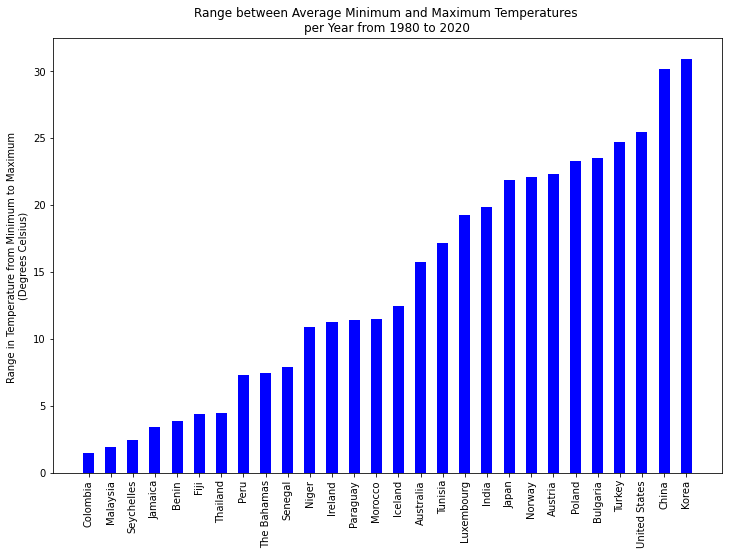

In [215]:
sorted_range = min_max_df.sort_values('Range') 

plt.figure(figsize=(12, 8))
plt.bar(sorted_range.index, sorted_range['Range'], color='b', width=0.5)
plt.xticks(rotation=90)
plt.ylabel('Range in Temperature from Minimum to Maximum \n(Degrees Celsius)')
plt.title('Range between Average Minimum and Maximum Temperatures \nper Year from 1980 to 2020')
plt.show()

From the graph above we can identify countries with the more extreme weather conditions. This will be an interesting comparison to Economic Indicators later on to see how these might be affected by Temperature.

## Histogram of Temperatures

A histogram is used to see the distribution in average temperature. From the bar charts above it is evident there is a fairly linear trend and there is not a specific temperature lots of countries have. 

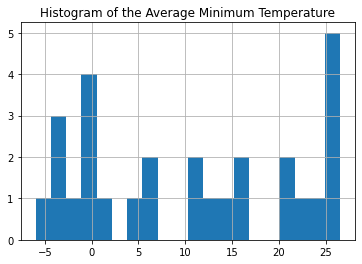

In [216]:
min_max_df['Avg Min Temp'].hist(bins=20)
plt.title('Histogram of the Average Minimum Temperature')
plt.show()

/Users/sophiecoding/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg Min Temp', ylabel='Density'>

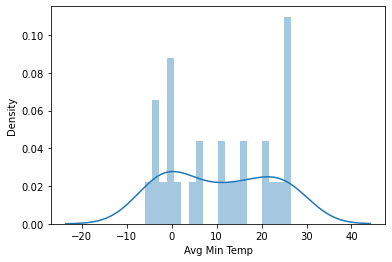

In [217]:
sns.distplot(min_max_df['Avg Min Temp'], bins=20)
plt.show()

# Create a Function to Extract a WEO Indicator from the Code and Country

Inputs: WEO Subject Code and Country Name

In [218]:
# Function to input the Country name and the Subject Code, and output a DataFrame with that data
def one_ind_one_country(WEO_code_, country_):
    # Load the GDP .csv file
    path_directory = os.path.join('./data', WEO_code_ + '.csv')
    gdp_df = pd.read_csv(path_directory, header=0, index_col='Country')
    gdp_df.reset_index()

    # Create a list of years to plot the data from and select the data from those columns
    years = [str(i) for i in range(1980, 2021)]
    gdp_df = gdp_df[years]

    # Transpose the dataframe so the country name is along the column names
    aus_gdp = gdp_df[gdp_df.index == country_.title()].T
    aus_gdp.index = pd.DatetimeIndex(aus_gdp.index)
    return aus_gdp

# Functions to Plot Line Graphs with 2 Time Series Variables

two_axis_plot_auto_lim: Sets the y limit to auto

two_axis_plot: Set your own y limit for var2

In [219]:
def two_axis_plot_auto_lim(var1, var2, title1, title2, title_):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(title1, color=color)

    ax1.plot(var1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Create a new axis that shares the same x axis

    color = 'tab:blue'
    ax2.set_ylabel(title2, color=color)  # ax1 set x axis parameters
    ax2.plot(var2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    low = dt.datetime.strptime('1980-01-01', '%Y-%m-%d')
    high = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
    plt.xlim([low, high])
    plt.title(title_)
    plt.show()

In [220]:
def two_axis_plot(var1, var2, title1, title2, title_, ylim2_):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(title1, color=color)

    ax1.plot(var1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(title2, color=color)  # we already handled the x-label with ax1
    ax2.plot(var2, color=color)
    ax2.set_ylim(ylim2_)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    low = dt.datetime.strptime('1980-01-01', '%Y-%m-%d')
    high = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
    plt.xlim([low, high])
    plt.title(title_)
    plt.show()

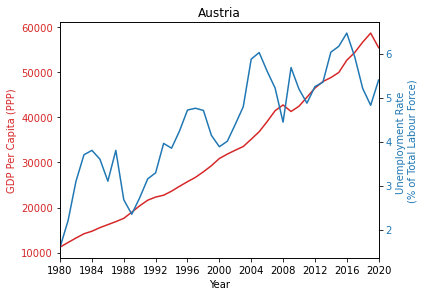

In [221]:
# Test the above functions to plot Austria GDP alongside Unemployment
gdp = 'PPPPC'
unemployment = 'LUR' 
country = 'Austria'
title_1 = 'GDP Per Capita (PPP)'
title_2 = 'Unemployment Rate \n(% of Total Labour Force)'
title = country

gdp_var = one_ind_one_country(gdp, country)
unemployment_var = one_ind_one_country(unemployment, country)

two_axis_plot_auto_lim(gdp_var, unemployment_var, title_1, title_2, title)

## Get GDP of all Countries in a DataFrame

Create a DataFrame with the GDP of every country. Columns are labelled as Country Names and the index is the date by years. 

In [222]:
# Print the gdp of one country to see how to format comes out
gdp_var

Country,Austria
1980-01-01,11227.04
1981-01-01,12252.31
1982-01-01,13240.95
1983-01-01,14187.11
1984-01-01,14746.34
1985-01-01,15543.38
1986-01-01,16210.52
1987-01-01,16868.12
1988-01-01,17608.35
1989-01-01,18965.09


In [390]:
# A for loop goes through every country and extracts the GDP per Capita and adds it to a new DataFrame
gdp_df = pd.DataFrame(columns=filtered_countries)

code = 'PPPPC'

for country in filtered_countries:
    gdp = one_ind_one_country(code, country)
    gdp_df[country] = gdp
    
gdp_df

,Australia,Austria,The Bahamas,Benin,Bulgaria,China,Colombia,Fiji,Iceland,India,...,Norway,Paraguay,Peru,Poland,Senegal,Seychelles,Thailand,Tunisia,Turkey,United States
1980-01-01,10493.28,11227.04,12571.87,984.882,5338.21,306.733,2840.64,2696.42,10927.45,532.041,...,14799.83,3532.89,3106.40,4823.83,1068.83,4384.46,1576.14,2132.03,3516.26,12552.94
1981-01-01,11771.25,12252.31,13112.42,1062.020,6134.77,348.055,3110.90,3054.20,12342.04,603.174,...,16399.92,4099.00,3498.01,4709.82,1196.60,4557.45,1791.23,2395.13,3926.53,13948.70
1982-01-01,12302.17,13240.95,14461.87,1112.430,6767.96,396.553,3262.85,3125.68,13222.39,647.450,...,17388.85,4166.67,3613.26,4715.15,1332.57,4711.02,1965.90,2470.70,4214.96,14404.99
1983-01-01,12563.47,14187.11,15691.86,1097.190,7225.85,450.585,3371.19,3034.17,13253.10,705.288,...,18733.86,4076.02,3324.46,5101.66,1274.01,4871.24,2117.43,2625.04,4486.25,15513.68
1984-01-01,13671.85,14746.34,16284.91,1106.490,7817.26,530.856,3534.89,3388.57,14125.77,741.444,...,20527.72,4215.83,3492.97,5221.26,1329.99,5233.29,2278.40,2842.64,4857.89,17086.44
1985-01-01,14664.85,15543.38,17262.46,1152.740,8203.70,612.806,3785.59,3311.72,14915.26,787.088,...,22281.10,4386.16,3595.42,5552.70,1375.69,5906.39,2415.51,2999.77,5116.46,18199.32
1986-01-01,15100.16,16210.52,17761.67,1170.770,8815.21,668.430,4003.66,3568.25,16063.04,822.810,...,23564.58,4348.26,4019.77,5826.41,1404.20,6033.50,2553.72,2902.81,5471.03,19034.77
1987-01-01,15977.40,16868.12,18559.78,1139.490,9470.47,752.552,4234.27,3379.99,17724.07,857.659,...,24428.71,4494.67,4339.67,6076.88,1480.95,6214.62,2814.68,3107.47,6051.13,20000.97
1988-01-01,16942.12,17608.35,19246.58,1181.810,10066.60,852.879,4468.16,3616.15,18080.51,952.714,...,25091.68,4775.30,3981.21,6491.66,1478.62,6751.22,3244.26,3165.48,6280.29,21376.00
1989-01-01,18149.18,18965.09,20116.50,1158.910,10454.80,909.800,4704.32,4196.13,18512.22,1027.050,...,26269.03,5089.74,3506.79,6996.41,1550.91,7691.51,3722.86,3314.74,6427.17,22814.08


### Identify Correlations between Country GDP

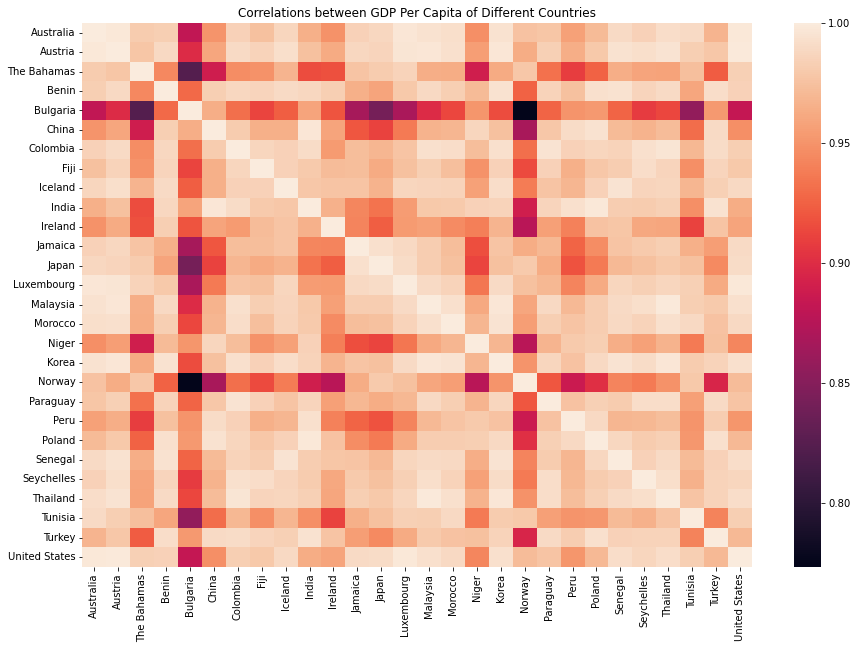

In [439]:
plt.figure(figsize=(15,10))
sns.heatmap(gdp_df.corr(),annot=False)
plt.title('Correlations between GDP Per Capita of Different Countries')

plt.show()

Almost every country has a strong correlation between their GDP over time with each other. This shows there are global trends in whether GDP is increasing or decreasing. Therefore, the average GDP of each country will be compared with weather rather than the GDP itself.

### Choose a Country and Compare their Economic Indicators

In [230]:
# Function to input the Country name and output a DataFrame with the Economic data
def country_econ_data(country_):
    # Load the GDP .csv file
    directory = os.path.join('./country', country_ + '.csv')
    econ_df = pd.read_csv(directory, header=0, index_col='WEO Subject Code')

    # Create a list of years to plot the data from and select the data from those columns
    years = [str(i) for i in range(1980, 2021)]
    econ_df = econ_df[years]

    # Transpose the dataframe so the country name is along the column names
    economic_df = econ_df.T
    economic_df.index = pd.DatetimeIndex(economic_df.index)
    return economic_df

In [231]:
country = 'Australia'
aus_econ_data = country_econ_data(country)
aus_econ_data

WEO Subject Code,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,NGDPRPPPPC,NGDPPC,NGDPDPC,...,TM_RPCH,TMG_RPCH,TX_RPCH,TXG_RPCH,LUR,LE,LP,NGDP_FY,BCA,BCA_NGDPD
1980-01-01,597.803,2.894,142.717,162.628,155.319,23.874,40387.34,26449.79,9641.88,10987.05,...,4.997,6.011,-0.915,16.399,6.133,6.287,14.802,142.717,-3.856,-2.371
1981-01-01,622.475,4.127,163.634,188.067,177.030,26.288,41390.27,27106.61,10880.54,12505.14,...,10.042,9.880,-3.403,2.533,5.783,6.416,15.039,163.634,-7.643,-4.064
1982-01-01,622.866,0.063,183.517,186.709,188.086,29.463,40739.78,26680.61,12003.27,12212.05,...,5.460,4.947,8.771,2.816,7.183,6.418,15.289,183.517,-7.681,-4.114
1983-01-01,619.916,-0.474,198.531,179.151,194.526,32.026,40037.24,26220.51,12822.14,11570.45,...,-9.819,-12.212,-4.360,8.826,9.967,6.301,15.483,198.531,-5.648,-3.153
1984-01-01,659.256,6.346,223.718,196.777,214.337,33.935,42051.68,27539.77,14270.23,12551.72,...,22.058,22.765,16.092,1.653,8.967,6.494,15.677,223.718,-8.175,-4.154
1985-01-01,695.228,5.456,248.383,174.067,233.179,35.727,43723.45,28634.62,15621.04,10947.21,...,3.790,5.805,10.397,14.528,8.258,6.701,15.901,248.383,-8.478,-4.871
1986-01-01,712.247,2.448,270.016,181.147,243.698,37.910,44132.70,28902.64,16730.89,11224.32,...,-3.149,-2.008,3.625,6.532,8.117,6.974,16.139,270.016,-9.163,-5.058
1987-01-01,747.095,4.893,303.502,212.712,261.944,40.624,45569.47,29843.59,18512.28,12974.46,...,2.516,1.316,12.119,11.568,8.108,7.128,16.395,303.502,-7.223,-3.396
1988-01-01,778.871,4.253,345.105,270.594,282.715,44.308,46675.09,30567.66,20680.97,16215.80,...,21.000,30.800,7.300,3.900,7.208,7.391,16.687,345.105,-10.407,-3.846
1989-01-01,814.889,4.624,388.380,307.720,307.388,47.660,48113.74,31509.83,22931.24,18168.82,...,21.162,20.738,3.292,3.657,6.133,7.718,16.937,388.380,-18.534,-6.023


Identify missing data from the Australia GDP plot.

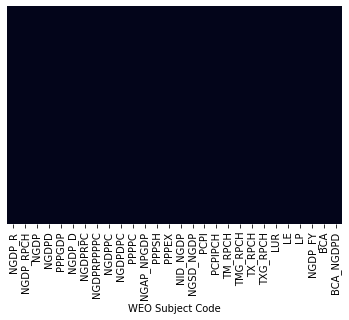

In [233]:
sns.heatmap(aus_econ_data.isnull(),cbar=False,yticklabels=False)
plt.show()

In [234]:
# Count nan values for each subject code and print those with nan values in the column
aus_nan_count = aus_econ_data.isna().sum()
nan_cols = aus_nan_count[aus_nan_count > 0]
print(nan_cols)

# print the subject descriptors
for i in nan_cols.index:
    print(i + ' = ' + codes_and_keys.loc[i, 'Subject Descriptor'])
    print('                ' + 'Units: ' + codes_and_keys.loc[i, 'Units'])

Series([], dtype: int64)


In [235]:
# Drop all columns with NaN values in them 
filtered_econ = aus_econ_data.dropna(axis=1)
filtered_econ

WEO Subject Code,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,NGDPRPPPPC,NGDPPC,NGDPDPC,...,TM_RPCH,TMG_RPCH,TX_RPCH,TXG_RPCH,LUR,LE,LP,NGDP_FY,BCA,BCA_NGDPD
1980-01-01,597.803,2.894,142.717,162.628,155.319,23.874,40387.34,26449.79,9641.88,10987.05,...,4.997,6.011,-0.915,16.399,6.133,6.287,14.802,142.717,-3.856,-2.371
1981-01-01,622.475,4.127,163.634,188.067,177.030,26.288,41390.27,27106.61,10880.54,12505.14,...,10.042,9.880,-3.403,2.533,5.783,6.416,15.039,163.634,-7.643,-4.064
1982-01-01,622.866,0.063,183.517,186.709,188.086,29.463,40739.78,26680.61,12003.27,12212.05,...,5.460,4.947,8.771,2.816,7.183,6.418,15.289,183.517,-7.681,-4.114
1983-01-01,619.916,-0.474,198.531,179.151,194.526,32.026,40037.24,26220.51,12822.14,11570.45,...,-9.819,-12.212,-4.360,8.826,9.967,6.301,15.483,198.531,-5.648,-3.153
1984-01-01,659.256,6.346,223.718,196.777,214.337,33.935,42051.68,27539.77,14270.23,12551.72,...,22.058,22.765,16.092,1.653,8.967,6.494,15.677,223.718,-8.175,-4.154
1985-01-01,695.228,5.456,248.383,174.067,233.179,35.727,43723.45,28634.62,15621.04,10947.21,...,3.790,5.805,10.397,14.528,8.258,6.701,15.901,248.383,-8.478,-4.871
1986-01-01,712.247,2.448,270.016,181.147,243.698,37.910,44132.70,28902.64,16730.89,11224.32,...,-3.149,-2.008,3.625,6.532,8.117,6.974,16.139,270.016,-9.163,-5.058
1987-01-01,747.095,4.893,303.502,212.712,261.944,40.624,45569.47,29843.59,18512.28,12974.46,...,2.516,1.316,12.119,11.568,8.108,7.128,16.395,303.502,-7.223,-3.396
1988-01-01,778.871,4.253,345.105,270.594,282.715,44.308,46675.09,30567.66,20680.97,16215.80,...,21.000,30.800,7.300,3.900,7.208,7.391,16.687,345.105,-10.407,-3.846
1989-01-01,814.889,4.624,388.380,307.720,307.388,47.660,48113.74,31509.83,22931.24,18168.82,...,21.162,20.738,3.292,3.657,6.133,7.718,16.937,388.380,-18.534,-6.023


Create Heat Maps of the correlations between economic indicators of Australia, selected above. 

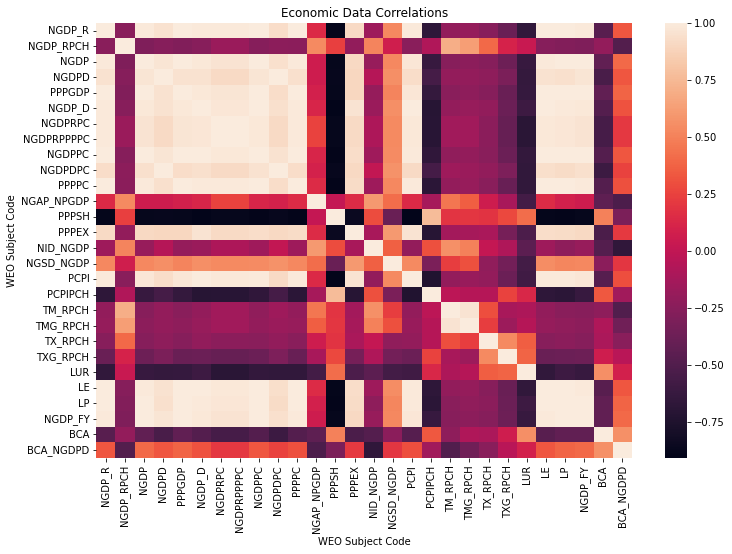

In [236]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(filtered_econ.corr(),annot=False, ax=ax1)
ax1.set_title('Economic Data Correlations')

plt.show()

Many of the variables in the WEO data spreadsheet are the same but with different units. This is why some of them have such strong correlations. Therefore the variables will be filtered further, taking forwards the most significant with the most useful variables. 

In [237]:
filtered_indicators = ['PPPPC', 'LUR', 'LP', 'BCA_NGDPD', 'PCPIPCH']
# , 'GGXWDG_NGDP', 'PCPIEPCH'
filtered_econ_ind = filtered_econ[filtered_indicators]

filtered_econ_ind

WEO Subject Code,PPPPC,LUR,LP,BCA_NGDPD,PCPIPCH
1980-01-01,10493.28,6.133,14.802,-2.371,10.136
1981-01-01,11771.25,5.783,15.039,-4.064,9.488
1982-01-01,12302.17,7.183,15.289,-4.114,11.352
1983-01-01,12563.47,9.967,15.483,-3.153,10.039
1984-01-01,13671.85,8.967,15.677,-4.154,3.960
1985-01-01,14664.85,8.258,15.901,-4.871,6.735
1986-01-01,15100.16,8.117,16.139,-5.058,9.050
1987-01-01,15977.40,8.108,16.395,-3.396,8.533
1988-01-01,16942.12,7.208,16.687,-3.846,7.270
1989-01-01,18149.18,6.133,16.937,-6.023,7.580


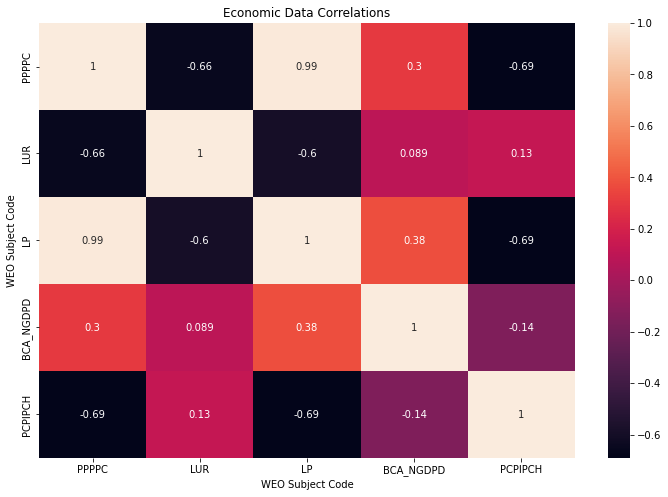

In [440]:
# Identify correlations between filtered variables of Australia
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(filtered_econ_ind.corr(),annot=True, ax=ax1)
ax1.set_title('Economic Data Correlations')
plt.show()

There are strong correlations between LP (Population) and PPPPC (GDP Per Capita). Similarly, there is a strong negative correlation between GDP Per Capita and PCPIPCH (Inflation), as well as GDP and LUR (unemployment). Population and Unemployment have a relatively strong negative correlation, and Population and Inflation have a negative correlation. 

The following plots are for GDP Per Capita, based on Population, Inflation and Unemployment.

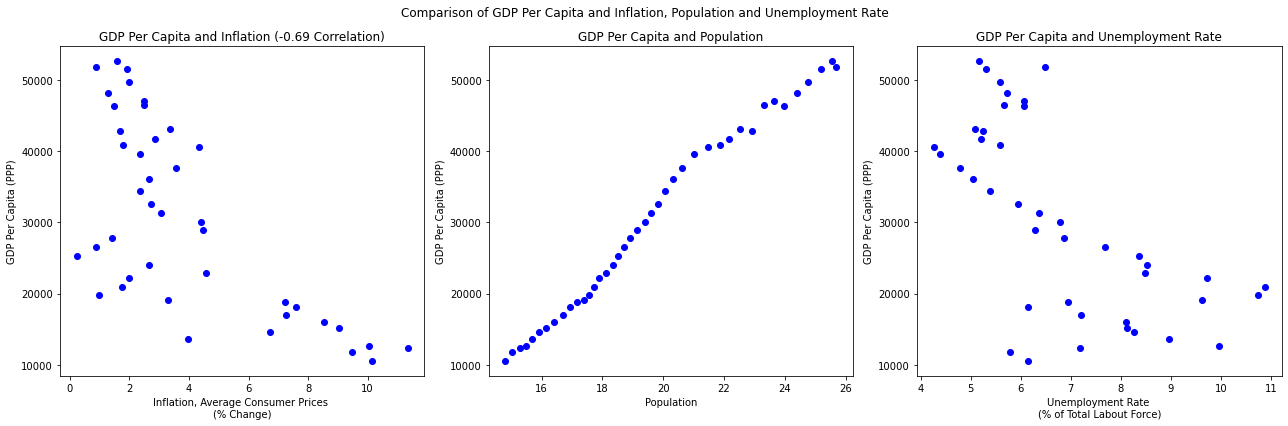

In [239]:
y = filtered_econ_ind['PPPPC']  # GDP Per Capita (PPP)
x1 = filtered_econ_ind['PCPIPCH']  # Inflation, Average Consumer Prices (% Change)
x2 = filtered_econ_ind['LP']  # Population 
x3 = filtered_econ_ind['LUR']  # Unemployment Rate (% of Total Labout Force)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.scatter(x1, y, color='b')
ax1.set_title('GDP Per Capita and Inflation (-0.69 Correlation)')
ax1.set_xlabel('Inflation, Average Consumer Prices \n(% Change)')
ax1.set_ylabel('GDP Per Capita (PPP)')

ax2.scatter(x2, y, color='b')
ax2.set_title('GDP Per Capita and Population')
ax2.set_xlabel('Population')
ax2.set_ylabel('GDP Per Capita (PPP)')

ax3.scatter(x3, y, color='b')
ax3.set_title('GDP Per Capita and Unemployment Rate')
ax3.set_xlabel('Unemployment Rate \n(% of Total Labout Force)')
ax3.set_ylabel('GDP Per Capita (PPP)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Comparison of GDP Per Capita and Inflation, Population and Unemployment Rate')
plt.show()

## Create Model 1

Let's create a model to predict GDP Per Capita (in Australia) and compare test this model. 

In [267]:
allx = filtered_econ_ind[['PCPIPCH', 'LP', 'LUR']]
y = filtered_econ_ind['PPPPC']

In [268]:
x_train, x_test, y_train, y_test = train_test_split(allx, y, test_size=0.2, random_state=5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 3)
(9, 3)
(32,)
(9,)


In [269]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [270]:
model.coef_
model.intercept_
equation = 'Equation: y = {:.2f} + {:.2f}*x1 + {:.2f}*x2 + {:.2f}*x3'.format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2])

print(equation)

Equation: y = -30199.09 + -429.44*x1 + 3529.72*x2 + -1072.40*x3


### Test the model

In [243]:
y_predict = model.predict(x_test)

maerr = mean_absolute_error(y_test, y_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)

print('MAE = ' + str(maerr))
print('RMSE = ' + str(rmse))
print('R2 = ' + str(r2))

MAE = 953.7154510947362
RMSE = 1293.7609514714072
R2 = 0.989218458108166


The R2 value seems a little too perfect. It is likely this is because population has been increasing for the past 20 years and so has GDP. However, if population were to decrease, would GDP continue to increase? There are not enough changes in the pattern of population to be confident that this has an impact on GDP. Therefore A new model will be built and tested excluding population. 

## Create Model 2

In [441]:
allx_2 = filtered_econ_ind[['PCPIPCH', 'LUR']]
y = filtered_econ_ind['PPPPC']

In [442]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(allx_2, y, test_size=0.2, random_state=5)

print(x_train_2.shape)
print(x_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(32, 2)
(9, 2)
(32,)
(9,)


In [443]:
model_2 = LinearRegression()
model_2.fit(x_train_2, y_train_2)

LinearRegression()

### Test the Model

In [444]:
y_predict = model.predict(x_test)

maerr = mean_absolute_error(y_test, y_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)

print('MAE = ' + str(maerr))
print('RMSE = ' + str(rmse))
print('R2 = ' + str(r2))

MAE = 6523.030755780994
RMSE = 8466.235873027792
R2 = 0.585476457124549


# Calculate the Mean GDP from 1980 to 2020

For every country, calculate the mean GDP and save this to a dataframe. 

In [247]:
mean_alltime_gdp = gdp_df.mean(axis=0)
mean_alltime_gdp

Australia        30302.500976
Austria          32179.980244
The Bahamas      26022.068780
Benin             1910.041024
Bulgaria         11718.085854
China             5339.210341
Colombia          8118.804878
Fiji              7130.581951
Iceland          31031.556585
India             2697.472878
Ireland          34694.173415
Jamaica           6860.890488
Japan            27523.958537
Luxembourg       64830.118537
Malaysia         14128.031463
Morocco           4379.114146
Niger              894.144732
Korea            19593.638780
Norway           44130.656585
Paraguay          7560.125122
Peru              6642.232439
Poland           14579.616829
Senegal           2117.442439
Seychelles       14383.484634
Thailand          8853.078780
Tunisia           6451.860000
Turkey           13376.178049
United States    36838.346829
dtype: float64

In [248]:
# Create a new DataFrame to compare temperature with GDP
gdp_and_temp = min_max_df
gdp_and_temp['GDP'] = mean_alltime_gdp

gdp_and_temp

,Avg All Time,Avg Min Temp,Avg Max Temp,Range,max std,min std,GDP
Australia,13.439024,5.807317,21.529268,15.721951,1.477878,0.748796,30302.500976
Austria,10.763211,-0.775610,21.565854,22.341463,1.424186,1.976586,32179.980244
Benin,27.592572,25.463415,29.339024,3.875610,0.440952,0.571732,1910.041024
Bulgaria,10.520528,-1.831707,21.682927,23.514634,1.350908,1.681285,11718.085854
China,12.970325,-3.192683,26.939024,30.131707,0.975930,1.405950,5339.210341
Colombia,13.537195,12.734146,14.195122,1.460976,0.496463,0.710848,8118.804878
Fiji,24.750684,22.439024,26.809756,4.370732,0.427086,0.770350,7130.581951
Iceland,4.868293,-0.997561,11.431707,12.429268,1.020892,1.154012,31031.556585
India,25.205229,13.960976,33.821951,19.860976,1.075758,0.857577,2697.472878
Ireland,9.744715,4.436585,15.685366,11.248780,0.924002,1.203486,34694.173415


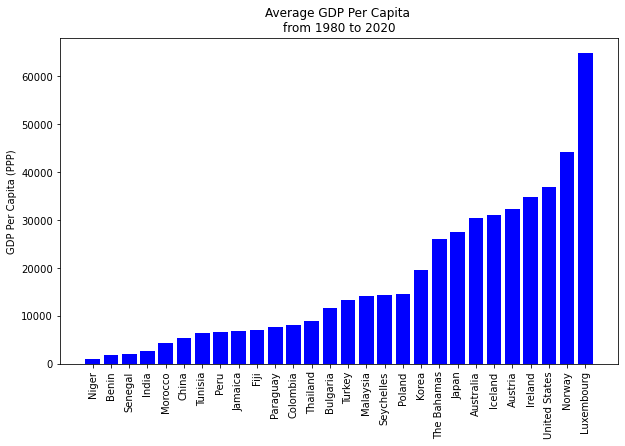

In [291]:
sort_by_gdp = gdp_and_temp.sort_values('GDP')

plt.figure(figsize=(10, 6))
plt.bar(sort_by_gdp.index, sort_by_gdp['GDP'], color='b')
plt.xticks(rotation=90)
plt.title('Average GDP Per Capita \nfrom 1980 to 2020')
plt.ylabel('GDP Per Capita (PPP)')

plt.show()

Determine whether region has an impact on GDP

In [292]:
print(country_rows.head)

<bound method NDFrame.head of      S.No.                     Country           Capital Continent  \
0        1                 Afghanistan             Kabul      Asia   
1        2                     Albania            Tirana    Europe   
2        3                     Algeria           Algiers    Africa   
3        4        American Samoa (USA)         Pago Pago   Oceania   
4        5                     Andorra  Andorra La Vella    Europe   
..     ...                         ...               ...       ...   
230    231                     Vietnam             Hanoi      Asia   
231    232  Wallis and Futuna (France)          Mata-Utu   Oceania   
233    234                       Yemen            Sana'a      Asia   
234    235                      Zambia            Lusaka    Africa   
235    236                    Zimbabwe            Harare    Africa   

                            location_name     latitude     longitude  \
0                      Kabul, Afghanistan   34.5260109   

In [297]:
# gdp_and_temp['Continent'] = gdp_and_temp.rename(index=country_rows['Capital Continent']).index
gdp_and_temp['Continent'] = gdp_and_temp.index.to_series().map(country_rows.set_index('Country')['Continent'])

In [298]:
gdp_and_temp.head()

,Avg All Time,Avg Min Temp,Avg Max Temp,Range,max std,min std,GDP,Continent
Australia,13.439024,5.807317,21.529268,15.721951,1.477878,0.748796,30302.500976,Oceania
Austria,10.763211,-0.775610,21.565854,22.341463,1.424186,1.976586,32179.980244,Europe
Benin,27.592572,25.463415,29.339024,3.875610,0.440952,0.571732,1910.041024,Africa
Bulgaria,10.520528,-1.831707,21.682927,23.514634,1.350908,1.681285,11718.085854,Europe
China,12.970325,-3.192683,26.939024,30.131707,0.975930,1.405950,5339.210341,Asia


In [310]:
sort_by_continent = gdp_and_temp.sort_values('Continent')
sort_by_continent.tail()

,Avg All Time,Avg Min Temp,Avg Max Temp,Range,max std,min std,GDP,Continent
Paraguay,22.938821,16.509756,27.929268,11.419512,0.668298,1.414709,7560.125122,South America
Colombia,13.537195,12.734146,14.195122,1.460976,0.496463,0.710848,8118.804878,South America
Peru,19.650813,16.460976,23.775610,7.314634,1.097675,0.982313,6642.232439,South America
Korea,10.767480,-5.975610,24.965854,30.941463,0.998151,2.041664,19593.638780,NaN
The Bahamas,25.438341,21.460976,28.900000,7.439024,0.645368,1.120687,26022.068780,NaN


In [309]:
sort_by_continent.loc['The Bahamas', 'Continent'] = 'North America'
sort_by_continent.loc['Korea', 'Continent'] = 'Asia'

In [325]:
grouped_continents = sort_by_continent.groupby(['Continent'], as_index=False).agg(
                      {'Avg All Time':['mean','std'],'Avg Min Temp':['mean','std'], 'Avg Max Temp':['mean','std'], 'GDP':['mean','std']})

In [326]:
grouped_continents.set_index('Continent')

Avg All Time           Avg Min Temp            Avg Max Temp  \
                      mean       std         mean        std         mean   
Continent                                                                   
Africa           25.865129  3.628684    21.480488   5.930212    29.930244   
Asia             20.544007  7.519544    11.579268  12.963237    28.742683   
Europe            9.764643  3.680836     0.542073   5.173453    18.753354   
North America    21.271547  9.253276    13.817073  17.249956    28.240244   
Oceania          19.094854  7.998551    14.123171  11.760393    24.169512   
South America    18.708943  4.771057    15.234959   2.165905    21.966667   

                                  GDP                
                    std          mean           std  
Continent                                            
Africa         2.816322   5151.394566   5584.758540  
Asia           3.231058  11986.321675   8811.592284  
Europe         3.784196  29692.912774  19524.183806  
North America  1.705680  21849.618659  21197.262662  
Oceania        3.733869  18716.541463  16385.021075  
South America  7.043501   7440.387480    745.532943

/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_30761/3060908885.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(grouped_continents['Continent'], rotation=45)
/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_30761/3060908885.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(grouped_continents['Continent'], rotation=45)
/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_30761/3060908885.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(grouped_continents['Continent'], rotation=45)
/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_30761/3060908885.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(grouped_continents['Continent'], rotation=45)


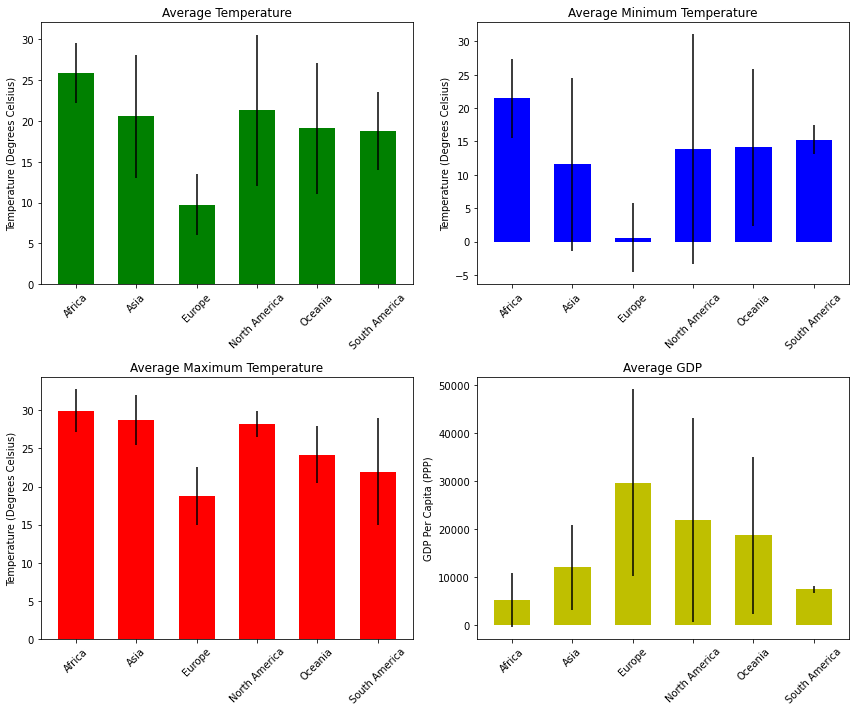

In [345]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


ax[0,0].bar(grouped_continents['Continent'], grouped_continents['Avg All Time']['mean'], width=0.6, color='g', yerr=grouped_continents['Avg All Time']['std'])
ax[0,0].set_xticklabels(grouped_continents['Continent'], rotation=45)
ax[0,0].set_ylabel('Temperature (Degrees Celsius)')
ax[0,0].set_title('Average Temperature')

ax[0,1].bar(grouped_continents['Continent'], grouped_continents['Avg Min Temp']['mean'], width=0.6, color='b', yerr=grouped_continents['Avg Min Temp']['std'])
ax[0,1].set_xticklabels(grouped_continents['Continent'], rotation=45)
ax[0,1].set_ylabel('Temperature (Degrees Celsius)')
ax[0,1].set_title('Average Minimum Temperature')

ax[1,0].bar(grouped_continents['Continent'], grouped_continents['Avg Max Temp']['mean'], width=0.6, color='r', yerr=grouped_continents['Avg Max Temp']['std'])
ax[1,0].set_xticklabels(grouped_continents['Continent'], rotation=45)
ax[1,0].set_ylabel('Temperature (Degrees Celsius)')
ax[1,0].set_title('Average Maximum Temperature')

ax[1,1].bar(grouped_continents['Continent'], grouped_continents['GDP']['mean'], width=0.6, color='y', yerr=grouped_continents['GDP']['std'])
ax[1,1].set_xticklabels(grouped_continents['Continent'], rotation=45)
ax[1,1].set_ylabel('GDP Per Capita (PPP)')
ax[1,1].set_title('Average GDP')

fig.tight_layout()
plt.show()

# GDP vs Temperature

Start by findind the correlation coefficients between all variables.

In [354]:
gdp_and_temp.corr()

,Avg All Time,Avg Min Temp,Avg Max Temp,Range,max std,min std,GDP
Avg All Time,1.000000,0.944924,0.837736,-0.660339,-0.736770,-0.665126,-0.610142
Avg Min Temp,0.944924,1.000000,0.616382,-0.868752,-0.795422,-0.758747,-0.541819
Avg Max Temp,0.837736,0.616382,1.000000,-0.145502,-0.424690,-0.343682,-0.538536
Range,-0.660339,-0.868752,-0.145502,1.000000,0.732278,0.737148,0.342048
max std,-0.736770,-0.795422,-0.424690,0.732278,1.000000,0.735284,0.614699
min std,-0.665126,-0.758747,-0.343682,0.737148,0.735284,1.000000,0.452767
GDP,-0.610142,-0.541819,-0.538536,0.342048,0.614699,0.452767,1.000000


The correlation coefficient between GDP and average all time temperature is the strongest. This means they have the closes relationship. 

Plot the temperatures against GDP per capita to visualise the relationships.

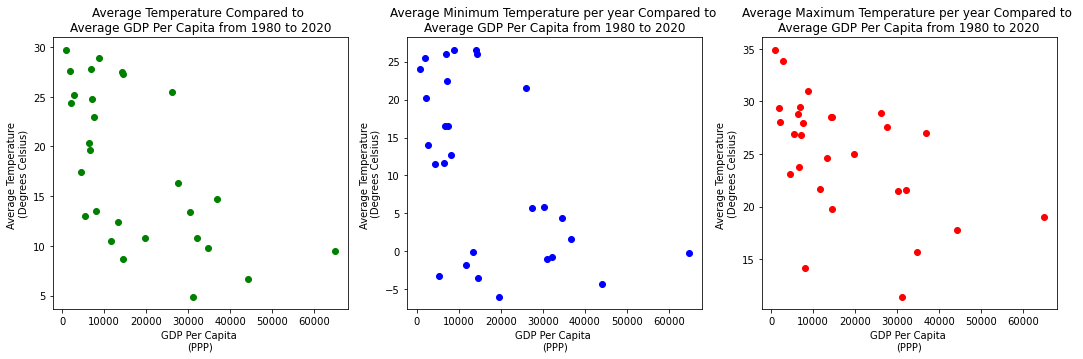

In [380]:
y1 = gdp_and_temp['Avg All Time']
y2 = gdp_and_temp['Avg Min Temp']
y3 = gdp_and_temp['Avg Max Temp']
x = gdp_and_temp['GDP']

figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.scatter(x, y1, color='g')
ax1.set_title('Average Temperature Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax1.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax1.set_xlabel('GDP Per Capita \n(PPP)')

ax2.scatter(x, y2, color='b')
ax2.set_title('Average Minimum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax2.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax2.set_xlabel('GDP Per Capita \n(PPP)')

ax3.scatter(x, y3, color='r')
ax3.set_title('Average Maximum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax3.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax3.set_xlabel('GDP Per Capita \n(PPP)')

plt.show()

It is fairly clear from these graphs that the relationship between average temperature and GDP per capita is the strongest. 

Now plot a line of best fit on each graph.

### Shown with Lines of Best Fit

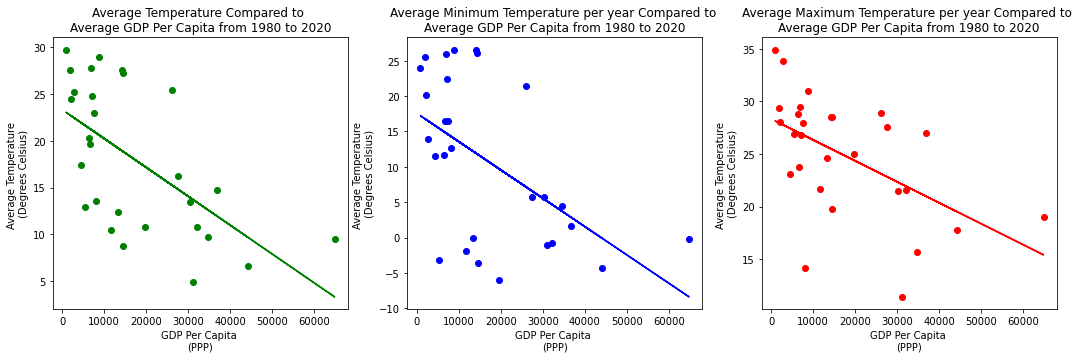

In [372]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.scatter(x, y1, color='g')
m1, b1 = np.polyfit(x, y1, 1)
ax1.plot(x, m1*x + b1, color='g')
ax1.set_title('Average Temperature Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax1.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax1.set_xlabel('GDP Per Capita \n(PPP)')

ax2.scatter(x, y2, color='b')
m2, b2 = np.polyfit(x, y2, 1)
ax2.plot(x, m2*x + b2, color='b')
ax2.set_title('Average Minimum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax2.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax2.set_xlabel('GDP Per Capita \n(PPP)')

ax3.scatter(x, y3, color='r')
m3, b3 = np.polyfit(x, y3, 1)
ax3.plot(x, m3*x + b3, color='r')
ax3.set_title('Average Maximum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax3.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax3.set_xlabel('GDP Per Capita \n(PPP)')

plt.show()

From plotting the lines of best fit it looks like there is not a linear correlation between the variables, but more of a logarithmic relationship.

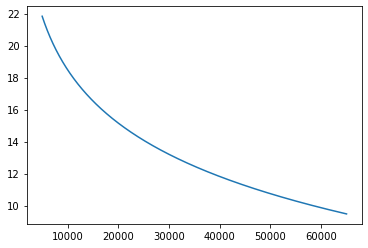

In [377]:
m, c = np.polyfit(np.log(x), y1, 1)
x1 = [i for i in range(5000, 65000)]
y2 = m*np.log(x1) + c
# array([ 8.46295607,  6.61867463])
# y ≈ 8.46 log(x) + 6.62
plt.plot(x1, y2)

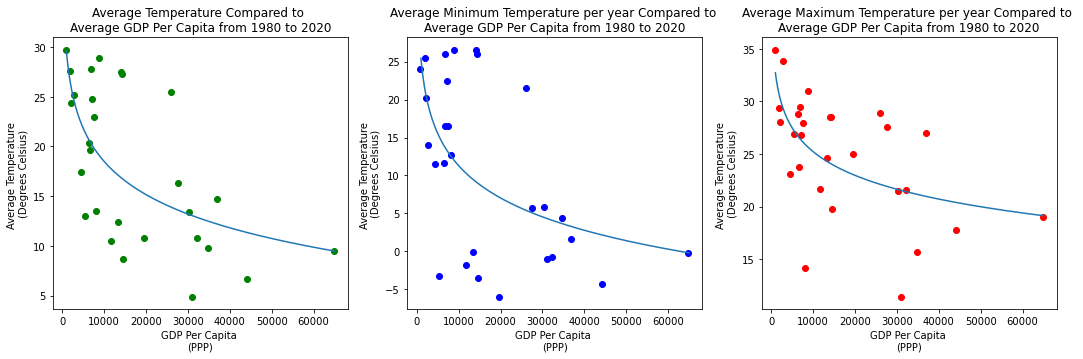

In [385]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
x1 = [i for i in range(1000, 65000)]

ax1.scatter(x, y1, color='g')
m1, c1 = np.polyfit(np.log(x), y1, 1)
y_1 = m1*np.log(x1) + c1
ax1.plot(x1, y_1)
ax1.set_title('Average Temperature Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax1.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax1.set_xlabel('GDP Per Capita \n(PPP)')

x2 = [i for i in range(1000, 65000)]
ax2.scatter(x, y2, color='b')
m2, c2 = np.polyfit(np.log(x), y2, 1)
y_2 = m2*np.log(x2) + c2
ax2.plot(x2, y_2)
ax2.set_title('Average Minimum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax2.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax2.set_xlabel('GDP Per Capita \n(PPP)')

x3 = [i for i in range(1000, 65000)]
ax3.scatter(x, y3, color='r')
m3, c3 = np.polyfit(np.log(x), y3, 1)
y_3 = m3*np.log(x3) + c3
ax3.plot(x3, y_3)
ax3.set_title('Average Maximum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax3.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax3.set_xlabel('GDP Per Capita \n(PPP)')

plt.show()

## Create a Model to Predict GDP

In [271]:
allx = gdp_and_temp[['Avg All Time', 'Avg Min Temp', 'Avg Max Temp']]
y = gdp_and_temp['GDP']

In [272]:
x_train, x_test, y_train, y_test = train_test_split(allx, y, test_size=0.2, random_state=5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 3)
(6, 3)
(22,)
(6,)


In [273]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [274]:
model.coef_
model.intercept_
equation = 'Equation: y = {:.2f} + {:.2f}*x1 + {:.2f}*x2 + {:.2f}*x3'.format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2])

print(equation)

Equation: y = 36043.14 + -11091.20*x1 + 4880.52*x2 + 5182.99*x3


### Test the model

In [275]:
y_predict = model.predict(x_test)

maerr = mean_absolute_error(y_test, y_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)

print('MAE = ' + str(maerr))
print('RMSE = ' + str(rmse))
print('R2 = ' + str(r2))

MAE = 6523.030755780994
RMSE = 8466.235873027792
R2 = 0.585476457124549


## GDP and Temperature by Continent

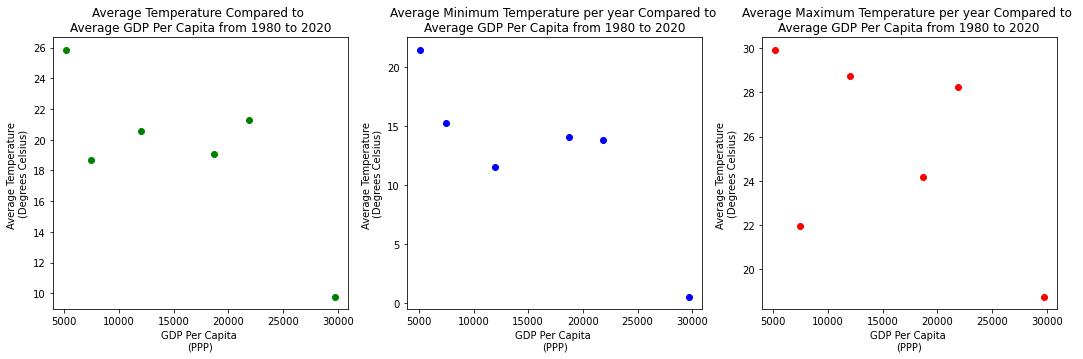

In [352]:
y1 = grouped_continents['Avg All Time']['mean']
y2 = grouped_continents['Avg Min Temp']['mean']
y3 = grouped_continents['Avg Max Temp']['mean']
x = grouped_continents['GDP']['mean']

figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.scatter(x, y1, color='g')
ax1.set_title('Average Temperature Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax1.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax1.set_xlabel('GDP Per Capita \n(PPP)')

ax2.scatter(x, y2, color='b')
ax2.set_title('Average Minimum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax2.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax2.set_xlabel('GDP Per Capita \n(PPP)')

ax3.scatter(x, y3, color='r')
ax3.set_title('Average Maximum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax3.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax3.set_xlabel('GDP Per Capita \n(PPP)')

plt.show()

In [353]:
grouped_continents.corr() 

Avg All Time           Avg Min Temp           Avg Max Temp  \
                          mean       std         mean       std         mean   
Avg All Time mean     1.000000  0.238288     0.950870  0.273299     0.901721   
             std      0.238288  1.000000     0.107750  0.911481     0.390621   
Avg Min Temp mean     0.950870  0.107750     1.000000  0.055414     0.724096   
             std      0.273299  0.911481     0.055414  1.000000     0.545276   
Avg Max Temp mean     0.901721  0.390621     0.724096  0.545276     1.000000   
             std     -0.275421 -0.430179    -0.031945 -0.756544    -0.588000   
GDP          mean    -0.773104  0.203712    -0.837186  0.299228    -0.539432   
             std     -0.431809  0.456092    -0.553200  0.611397    -0.167297   

                                  GDP            
                        std      mean       std  
Avg All Time mean -0.275421 -0.773104 -0.431809  
             std  -0.430179  0.203712  0.456092  
Avg Min Temp mean -0.031945 -0.837186 -0.553200  
             std  -0.756544  0.299228  0.611397  
Avg Max Temp mean -0.588000 -0.539432 -0.167297  
             std   1.000000 -0.328196 -0.649430  
GDP          mean -0.328196  1.000000  0.904783  
             std  -0.649430  0.904783  1.000000

The correlation between GDP and Average Minimum temperature is very strong, at -0.837186. This shows a negative correlation. The correlation between GDP and Avg All time temperature is also strong at -0.773104. 

As the correlation between Average Minimum Temperature and GDP Per Capita is closer to -1 than GDP with Average All Time Temperature, this has the strongest relationship. 

## Calculate Growth Rate of GDP

In [400]:
# Change in GDP per capita from 1980 to 2020
gdp_growth = gdp_df.iloc[-1] / gdp_df.iloc[0]
# gdp_growth = pd.Series(np.mean(np.stack((gdp_growth_1, gdp_growth_2)), axis=0))

gdp_growth

Australia         4.934647
Austria           4.939248
The Bahamas       2.643477
Benin             3.552304
Bulgaria          4.443634
China            55.762308
Colombia          5.095119
Fiji              4.462383
Iceland           5.130726
India            12.236012
Ireland          13.023210
Jamaica           3.432496
Japan             4.614814
Luxembourg        7.534747
Malaysia          8.219731
Morocco           5.153089
Niger             1.832557
Korea            20.628018
Norway            4.448765
Paraguay          3.637707
Peru              3.824569
Poland            7.082573
Senegal           3.276976
Seychelles        5.828449
Thailand         11.567050
Tunisia           4.756837
Turkey            8.659402
United States     5.047303
dtype: float64

In [401]:
gdp_and_temp['GDP Growth'] = gdp_growth

Assess correlations between Temperature and GDP growth.

<function matplotlib.pyplot.show(close=None, block=None)>

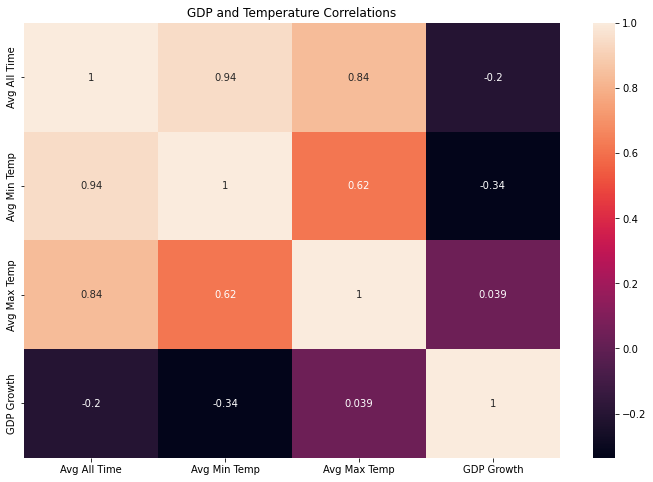

In [416]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(gdp_and_temp[['Avg All Time', 'Avg Min Temp', 'Avg Max Temp', 'GDP Growth']].corr(),annot=True, ax=ax1)
ax1.set_title('GDP and Temperature Correlations')
plt.show()

There are no strong correlations between the GDP growth and temperature, so let's plot to see what the data is looking like. 

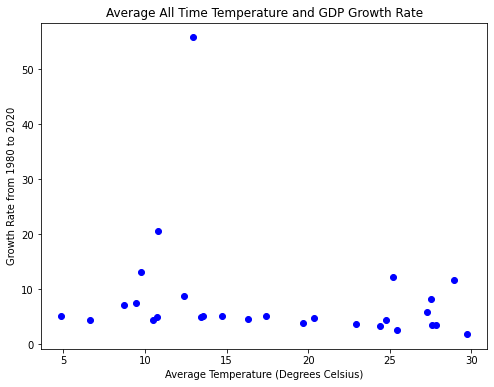

In [420]:
plt.figure(figsize=(8,6))
plt.scatter(gdp_and_temp['Avg All Time'], gdp_and_temp['GDP Growth'], color='b')
plt.title('Average All Time Temperature and GDP Growth Rate')
plt.xlabel('Average Temperature (Degrees Celsius)')
plt.ylabel('Growth Rate from 1980 to 2020')
coef1 = np.corrcoef(gdp_and_temp['Avg All Time'], gdp_and_temp['GDP Growth'])

China is an extreme outlier in this case, however we know the data source is reliable and so this is not an anomoly. Understanding the context and history of China's growth, it is an exception and very few countries have growth this high. Therefore, to assess the relationships between the rest of the data, China will be removed and the graph will be plotted again.

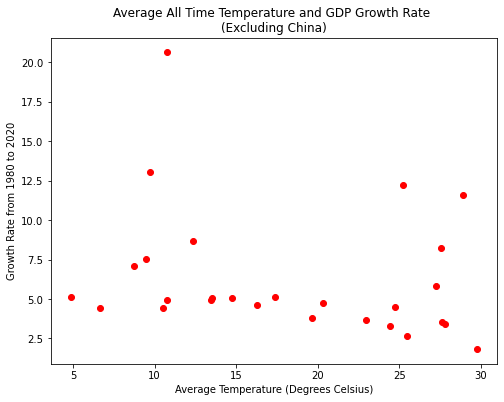

In [423]:
plt.figure(figsize=(8,6))
not_china = gdp_and_temp[gdp_and_temp.index != 'China']
plt.scatter(not_china['Avg All Time'], not_china['GDP Growth'], color='r')
plt.title('Average All Time Temperature and GDP Growth Rate \n(Excluding China)')
plt.xlabel('Average Temperature (Degrees Celsius)')
plt.ylabel('Growth Rate from 1980 to 2020')
coef2 = np.corrcoef(not_china['Avg All Time'], not_china['GDP Growth'])

There is still no clear correlation and so will not be explored further.

# List of Subject Codes and Subject Descriptors

For reference for plotting graphs.

In [386]:
# list unique countries
codes_and_keys

,Subject Descriptor,Units
WEO Subject Code,,
NGDP_R,"Gross domestic product, constant prices",National currency
NGDP_RPCH,"Gross domestic product, constant prices",Percent change
NGDP,"Gross domestic product, current prices",National currency
NGDPD,"Gross domestic product, current prices",U.S. dollars
PPPGDP,"Gross domestic product, current prices",Purchasing power parity; international dollars
NGDP_D,"Gross domestic product, deflator",Index
NGDPRPC,"Gross domestic product per capita, constant pr...",National currency
NGDPRPPPPC,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2017 international do...
NGDPPC,"Gross domestic product per capita, current prices",National currency


# Population vs. Temperature

You can see from these graphs that temperature changes very little over time compared to GDP per capita. With temperature, you're looking at just a degree or even less change over 40 years, whereas with GDP per capita, this can change by a huge amount more. Therefore, from now on the average temperature will be taken from each country and compared with average GDP for that country over time. It will also be compared with the speed of growth from 1980 to the present day.

In [389]:
# A for loop goes through every country and extracts the GDP per Capita and adds it to a new DataFrame
pop_df = pd.DataFrame(columns=filtered_countries)

code = 'LP'

for country in filtered_countries:
    pop = one_ind_one_country(code, country)
    pop_df[country] = pop
    
pop_df

,Australia,Austria,The Bahamas,Benin,Bulgaria,China,Colombia,Fiji,Iceland,India,...,Norway,Paraguay,Peru,Poland,Senegal,Seychelles,Thailand,Tunisia,Turkey,United States
1980-01-01,14.802,7.540,0.211,3.636,8.808,987.05,27.639,0.634,0.227,698.953,...,4.092,3.151,17.333,35.567,5.648,0.063,47.374,6.451,45.272,227.622
1981-01-01,15.039,7.556,0.215,3.763,8.834,1000.72,28.255,0.649,0.229,715.385,...,4.107,3.245,17.769,35.887,5.803,0.064,48.326,6.633,46.314,229.916
1982-01-01,15.289,7.565,0.220,3.878,8.859,1016.54,28.875,0.666,0.232,732.240,...,4.123,3.342,18.206,36.216,5.966,0.064,49.256,6.795,47.382,232.128
1983-01-01,15.483,7.543,0.226,4.004,8.881,1030.08,29.498,0.683,0.236,749.429,...,4.134,3.442,18.644,36.731,6.140,0.064,50.174,6.956,48.461,234.247
1984-01-01,15.677,7.544,0.231,4.130,8.897,1043.57,30.124,0.698,0.238,766.833,...,4.146,3.545,19.084,37.049,6.322,0.065,51.095,7.037,49.532,236.307
1985-01-01,15.901,7.549,0.234,4.267,8.903,1058.51,29.921,0.709,0.241,784.360,...,4.159,3.652,19.526,37.327,6.512,0.065,52.027,7.269,50.582,238.416
1986-01-01,16.139,7.557,0.238,4.404,8.901,1075.07,30.541,0.715,0.242,801.975,...,4.174,3.767,19.973,37.558,6.711,0.066,52.980,7.552,51.606,240.593
1987-01-01,16.395,7.567,0.242,4.540,8.889,1093.00,31.181,0.718,0.244,819.682,...,4.198,3.887,20.425,37.750,6.918,0.068,53.946,7.713,52.607,242.751
1988-01-01,16.687,7.576,0.247,4.687,8.865,1110.26,31.834,0.719,0.248,837.469,...,4.221,4.010,20.878,37.786,7.130,0.069,54.892,7.845,53.588,244.968
1989-01-01,16.937,7.594,0.251,4.826,8.826,1127.04,32.494,0.733,0.252,855.335,...,4.233,4.138,21.326,37.824,7.346,0.069,55.772,7.986,54.554,247.286


In [424]:
mean_alltime_pop = pop_df.mean(axis=0)
mean_alltime_pop

Australia          19.660634
Austria             8.080561
The Bahamas         0.300220
Benin               7.214756
Bulgaria            8.022439
China            1239.033659
Colombia           38.733171
Fiji                0.790537
Iceland             0.284780
India            1051.047390
Ireland             4.040780
Jamaica             2.519341
Japan             125.015561
Luxembourg          0.452049
Malaysia           23.447024
Morocco            28.140341
Niger              12.622098
Korea              46.196683
Norway              4.598829
Paraguay            5.243634
Peru               25.613829
Poland             37.920805
Senegal            10.270390
Seychelles          0.079341
Thailand           61.336146
Tunisia             9.437146
Turkey             64.601341
United States     280.396512
dtype: float64

In [425]:
gdp_and_temp['Population'] = mean_alltime_pop
gdp_and_temp

,Avg All Time,Avg Min Temp,Avg Max Temp,Range,max std,min std,GDP,Continent,GDP Growth,Population
Australia,13.439024,5.807317,21.529268,15.721951,1.477878,0.748796,30302.500976,Oceania,4.934647,19.660634
Austria,10.763211,-0.775610,21.565854,22.341463,1.424186,1.976586,32179.980244,Europe,4.939248,8.080561
Benin,27.592572,25.463415,29.339024,3.875610,0.440952,0.571732,1910.041024,Africa,3.552304,7.214756
Bulgaria,10.520528,-1.831707,21.682927,23.514634,1.350908,1.681285,11718.085854,Europe,4.443634,8.022439
China,12.970325,-3.192683,26.939024,30.131707,0.975930,1.405950,5339.210341,Asia,55.762308,1239.033659
Colombia,13.537195,12.734146,14.195122,1.460976,0.496463,0.710848,8118.804878,South America,5.095119,38.733171
Fiji,24.750684,22.439024,26.809756,4.370732,0.427086,0.770350,7130.581951,Oceania,4.462383,0.790537
Iceland,4.868293,-0.997561,11.431707,12.429268,1.020892,1.154012,31031.556585,Europe,5.130726,0.284780
India,25.205229,13.960976,33.821951,19.860976,1.075758,0.857577,2697.472878,Asia,12.236012,1051.047390
Ireland,9.744715,4.436585,15.685366,11.248780,0.924002,1.203486,34694.173415,Europe,13.023210,4.040780


### Population

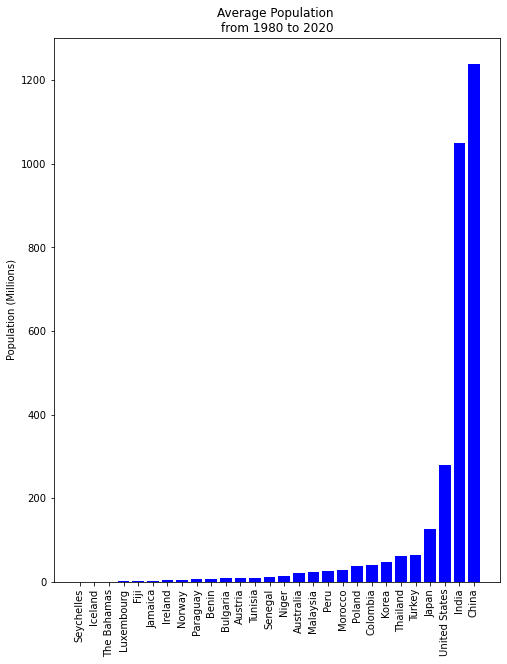

In [428]:
sort_by_pop = gdp_and_temp.sort_values('Population')

plt.figure(figsize=(8, 10))
plt.bar(sort_by_pop.index, sort_by_pop['Population'], color='b')
plt.xticks(rotation=90)
plt.title('Average Population \nfrom 1980 to 2020')
plt.ylabel('Population (Millions)')

plt.show()